## COVID Study - On-line part, Descriptives
### Overview
- participants completed 20 on-line sessions: 3 "long", 12 "short" and 5 "flash" (super short)
- some questions were added throughout, final set of questions is [here](s15.pdf)
- in this overview only people who completed the last session are included (we allowed participants to miss up to two sessions)
- we also invited all Berlin participants to do the learning task in the lab during the peak of the second wave ("low environemntal threat"), and we will do this again later this year ("low environemntal threat" condition)

#### Sessions
- 12 "short" surveys
  - demographic measurements
  - state measures (STAI-STATE and STICSA)
  - COVID-related measures
- 5 "extra" flash survey sessions
  - core COVID-related measures
  - STICSA-STATE
- 3 "long" surveys - same as short version plus:
  - trait anxiety (STAI-TRAIT, STICSA)
  - depressive symptoms (BDI-II)
  - catastrophizing

#### Dates
|   | Open date  | Closed date  | Invited UK | Completed/Good UK  | Invited BE | Completed/Good BE | Comment  |
|---|---|---|---|---|---|---|---|
| Session 1 | 18/4/2020  | 1/5/2020  |  N/A  | 330  | 100  | 96  |  |
| Session 2 |  4/5/2020 | 11/5/2020  |  313 | 306  | 90  |  89  |  |
| Session 3 |  18/5/2020 | 20/5/2020  |  306  | 293  | 89  | 85  |  Berlin 2 re-invited for sess4  |
| Session 4 |  1/6/2020 | 4/6/2020  | 293  |  286 | 87  |  84 |   |
| Session 5 | 15/6/2020  | 24/6/2020  |  286 | 277  | 85  | 84  |  Berlin 1 re-invited  |
| Session 6 | 29/6/2020  | 8/7/2020  | 277  | 270 | 84  | 83 |   |
| Session 7 |  13/7/2020 |  19/7/2020 | 270  | 263  |  83 | 81  |   |
| Session 8 | 27/7/2020  | 1/8/2020   | 263  |  253 |  82 |  81/2 |  Berlin 1 re-invited  |
| Session EXTRA 1 | 3/8/2020  |  7/8/2020 | 263  | 247  |  82 | 66  |   |
| Session 9 | 10/8/2020  | 16/8/2020  | 263  |  253 |  81 | 81  |   |
| Session EXTRA 2 | 17/8/2020  |  23/8/2020 | 263  | 246  |  82 | 71  |   |
| Session 10 | 24/8/2020  | 28/8/2020  | 263  |  252 |  81 | 81 |   |
| Session 11 | 7/9/2020  | 15/9/2020  | 263  | 251  | 81  | 79  |   |
| Session 12 | 21/9/2020  | 27/9/2020  | 257  |  243 | 81  | 77  |   |
| Session EXTRA 3 | 5/10/2020  |  16/10/2020 | 257  | 241  |  81 | 69  |   |
| Session 13 | 19/10/2020  | 26/10/2020  | 257  | 245  | 81  | 77  |   |
| Session EXTRA 4 | 2/11/2020  |  13/11/2020 | 257  | 241  |  81 | 73  |   |
| Session 14 | 16/11/2020  | 29/11/2020  | 254  | 243  | 80  | 78  |   |
| Session EXTRA 5 | 30/11/2020  |  10/12/2020 | 254  | 231  |  80 | 64  |   |
| Session 15 | 14/12/2020  | 17/12/2020  | 252  | 226  | 80  | 76  |   |

### Initial analysis plan
The goal is to understand how the reports change as a function of trait anxiety (or "negative affect")
1. Initially, pool data to "affective" (worries, avoidance) and "estimates" (predictions, probability judgements) categories. Later, perhaps try to do factor analysis to let the data drive the categories. 
2. For each category evaluate steepness of extinction and reinstatement as a function of anxiety, controlling for objective measures (country, infected, close person infected/died, etc)
3. More formal analysis using hierarchical regression approach (or later maybe model using Gaussian processes) on the actual ratings.
4. Work on "individual context", we know where they live and what news they are reading, so this can be incorporated in to the analysis.

The data are quite rich and might turn to multiple papers (the lab data for example), but I would aim at getting these done in the next 2-3 months and try to report the main analysis on anxiety during COVID-19. 

 

In [ ]:


import numpy as np
import os
import pandas as pd
from cov_functions import *
import matplotlib.patches as mpatches

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))
# current working directory
print(os.getcwd())

## Number of participants 



In [2]:
df = pd.read_csv("../../data/dates.csv")

#print(df)
df["open_date"] = pd.to_datetime(df["open_date"], format="%d/%m/%Y")
df["closed_date"] = pd.to_datetime(df["closed_date"], format="%d/%m/%Y")
df["completed_p_UK"] = df["completed_UK"] /  df["completed_UK"][0]
df["completed_p_BE"] = df["completed_BE"] /  df["completed_BE"][0]
dates = df;

cdf = pd.melt(df, id_vars=["open_date", "session"], value_vars=["completed_p_UK", "completed_p_BE"], var_name="country", value_name="completed")
cdf["country"] = cdf["country"].str.replace('completed_p_', '')
# turn to percentage 
cdf["completed"]  = cdf["completed"] *100




**Starting UK sample:** 330  
**Final UK sample:** 226

**Starting BE sample:** 96  
**Final BE sample:** 76


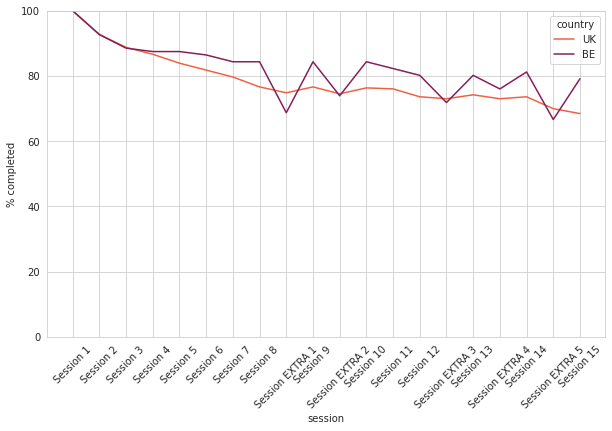

In [3]:
fig =  plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.lineplot(
    data=cdf,
    x="session", y="completed",
    hue="country", palette="rocket_r",
    
)
plt.ylim((0, 100));
plt.xticks(rotation=45);
plt.ylabel("% completed");

---
## basic demographics


In [4]:
# load main dataset
df = pd.read_csv("../../data/full_dataset_only_complete.csv")
print(df.loc[df["SESSIONID"].isin(["15.0"]), :].shape)
# for basic demographics, only keep the long sessions 1 8 and 15
df = df.loc[df["SESSIONID"].isin(["1.0", "8.0", "15.0"]), :]


(300, 135)


### age & sex


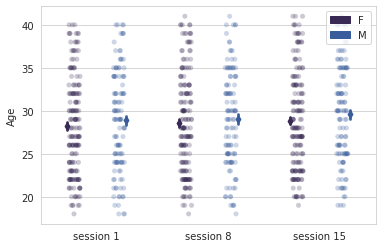

In [5]:
pal = sns.color_palette("mako",4)
g=sns.stripplot(x="SESSIONID", y="sr_age", hue="sr_gender",
              data=df, dodge=True, alpha=.25, zorder=1, palette=pal);
g.legend_.remove()
g=sns.pointplot(x="SESSIONID", y="sr_age", hue="sr_gender",
              data=df, dodge=.532, join=False, palette=pal,
              markers="d", scale=.75, ci=68);

# replace labels
plt.ylabel("Age");
plt.xlabel("");
plt.xticks(np.arange(3),["session 1", "session 8", "session 15"]);
p1 = mpatches.Patch(color=pal[0], label='F');
p2 = mpatches.Patch(color=pal[1], label='M');
plt.legend(handles=[p1,p2]);

#plt.legend(("F", "M"), title="Sex");



## personality measures
### trait anxiety (STAI)

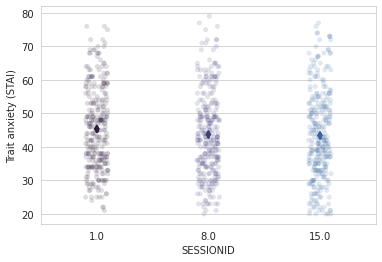

In [6]:
pal = sns.color_palette("mako")
sns.stripplot(x="SESSIONID", y="stai_ta",
              data=df, dodge=True, alpha=.15, zorder=1, palette=pal);
sns.pointplot(x="SESSIONID", y="stai_ta",
              data=df, dodge=.532, join=False, palette=pal,
              markers="d", scale=.75, ci=68);
plt.ylabel("Trait anxiety (STAI)");

### trait anxiety (STICSA)

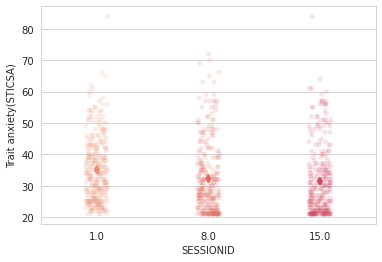

In [7]:

pal = sns.color_palette("flare")
sns.stripplot(x="SESSIONID", y="sticsa_ta",
              data=df, dodge=True, alpha=.15, zorder=1, palette=pal);
sns.pointplot(x="SESSIONID", y="sticsa_ta",
              data=df, dodge=.532, join=False, palette=pal,
              markers="d", scale=.75, ci=68);
plt.ylabel("Trait anxiety(STICSA)");

### STAI x STICSA correlation 

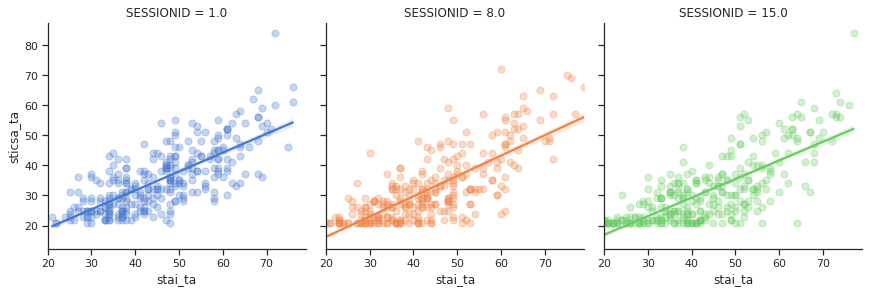

In [8]:
sns.set_theme(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="stai_ta", y="sticsa_ta", col="SESSIONID", hue="SESSIONID", data=df,
           col_wrap=3, ci=68, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.3})

### STAI-TRAIT across sessions

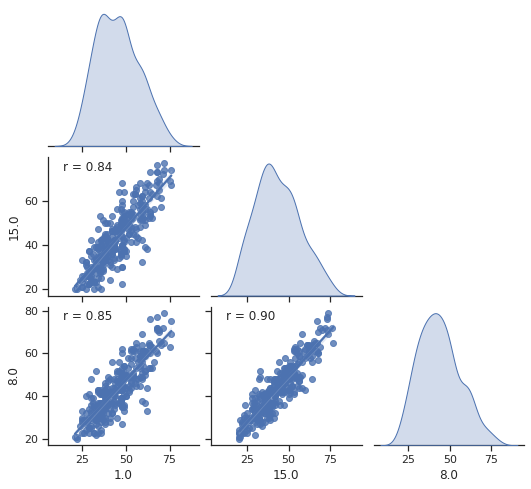

In [9]:
sdf = df.loc[:,["stai_ta", "SESSIONID", "PROLIFICID"]]
sdf = sdf.pivot(index="PROLIFICID", columns="SESSIONID", values="stai_ta").dropna()
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg")
g.map_lower(corrfunc)
plt.subplots_adjust(top=0.9)

### STICSA-TRAIT across sessions

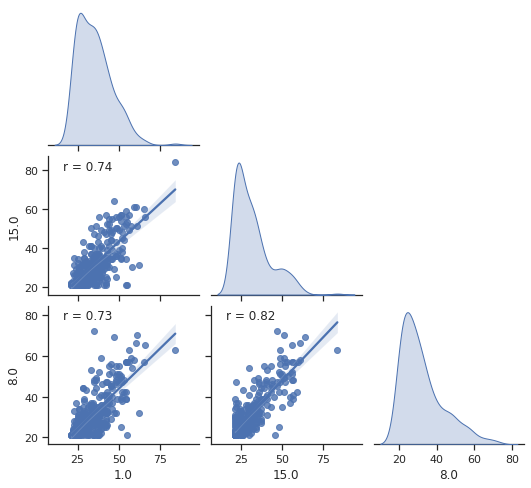

In [10]:
sdf = df.loc[:,["sticsa_ta", "SESSIONID", "PROLIFICID"]]
sdf = sdf.pivot(index="PROLIFICID", columns="SESSIONID", values="sticsa_ta").dropna()
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg")
g.map_lower(corrfunc)
plt.subplots_adjust(top=0.9)

### state anxiety (STAI)

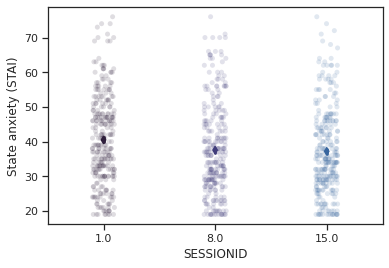

In [11]:
pal = sns.color_palette("mako")
sns.stripplot(x="SESSIONID", y="stai_sa",
              data=df, dodge=True, alpha=.15, zorder=1, palette=pal);
sns.pointplot(x="SESSIONID", y="stai_sa",
              data=df, dodge=.532, join=False, palette=pal,
              markers="d", scale=.75, ci=68);
plt.ylabel("State anxiety (STAI)");

### state anxiety (STICSA)

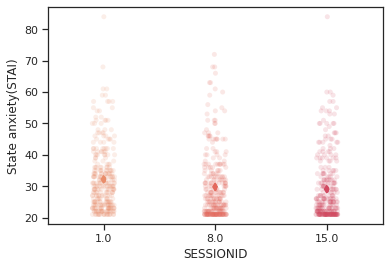

In [12]:

pal = sns.color_palette("flare")
sns.stripplot(x="SESSIONID", y="sticsa_sa",
              data=df, dodge=True, alpha=.15, zorder=1, palette=pal);
sns.pointplot(x="SESSIONID", y="sticsa_sa",
              data=df, dodge=.532, join=False, palette=pal,
              markers="d", scale=.75, ci=68);
plt.ylabel("State anxiety(STAI)");

### STAI x STICSA correlation 

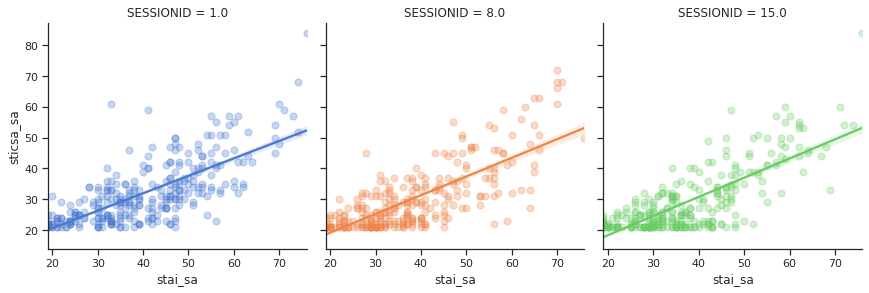

In [13]:
sns.set_theme(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="stai_sa", y="sticsa_sa", col="SESSIONID", hue="SESSIONID", data=df,
           col_wrap=3, ci=68, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.3})

### STAI across sessions

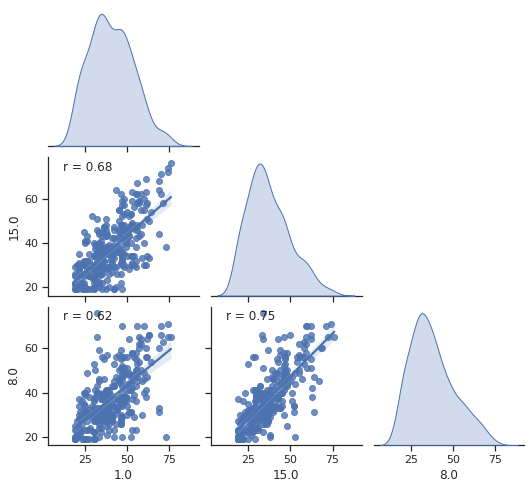

In [14]:
sdf = df.loc[:,["stai_sa", "SESSIONID", "PROLIFICID"]]
sdf = sdf.pivot(index="PROLIFICID", columns="SESSIONID", values="stai_sa").dropna()
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg")
g.map_lower(corrfunc)
plt.subplots_adjust(top=0.9)

### STICSA across sessions

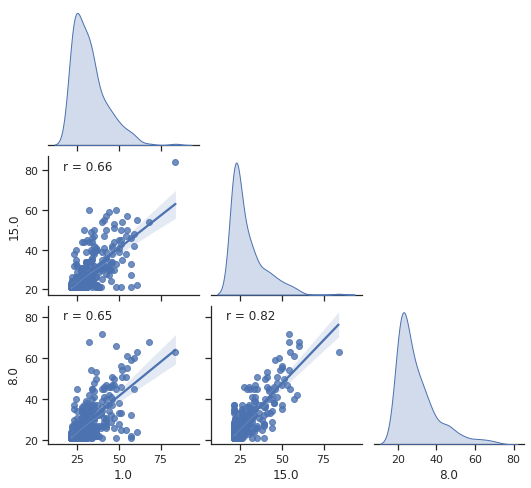

In [15]:
sdf = df.loc[:,["sticsa_sa", "SESSIONID", "PROLIFICID"]]
sdf = sdf.pivot(index="PROLIFICID", columns="SESSIONID", values="sticsa_sa").dropna()
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg")
g.map_lower(corrfunc)
plt.subplots_adjust(top=0.9)

### BDI (depressive symptoms)

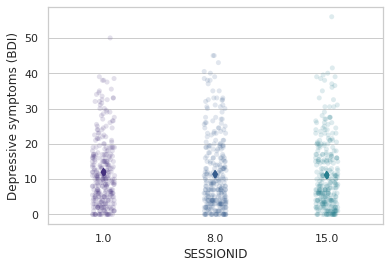

In [16]:
sns.set_style("whitegrid")
pal = sns.color_palette("viridis")
sns.stripplot(x="SESSIONID", y="bdi",
              data=df, dodge=True, alpha=.15, zorder=1, palette=pal);
sns.pointplot(x="SESSIONID", y="bdi",
              data=df, dodge=.532, join=False, palette=pal,
              markers="d", scale=.75, ci=68);
plt.ylabel("Depressive symptoms (BDI)");

### Catastrophizing

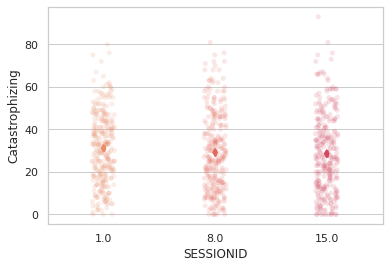

In [17]:

pal = sns.color_palette("flare")
sns.stripplot(x="SESSIONID", y="cat",
              data=df, dodge=True, alpha=.15, zorder=1, palette=pal);
sns.pointplot(x="SESSIONID", y="cat",
              data=df, dodge=.532, join=False, palette=pal,
              markers="d", scale=.75, ci=68);
plt.ylabel("Catastrophizing");


---
## COVID Questionnaires
### COVID Section I: "Objective measures"
#### Were you infected?  

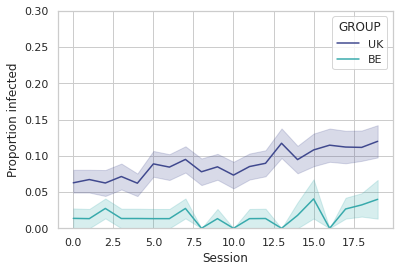

In [18]:
# load main dataset
df = pd.read_csv("../../data/full_dataset_only_complete.csv")
sns.set_style("whitegrid")
pal = sns.color_palette("mako",2)

df2=df.loc[:,["session", "q6_me_inf", "GROUP"]].dropna()
g=sns.lineplot(x="session", y="q6_me_inf", hue="GROUP",
              data=df2, palette=pal, ci=68);

# replace labels
plt.ylabel("Proportion infected (self-report)");
plt.xlabel("Session");
plt.ylim((0, 0.3));

#### Basic information about individual context

1 - Strongly disagree
7 - Strongly agree

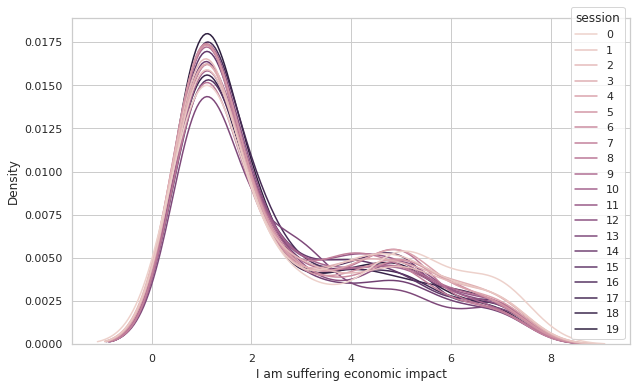

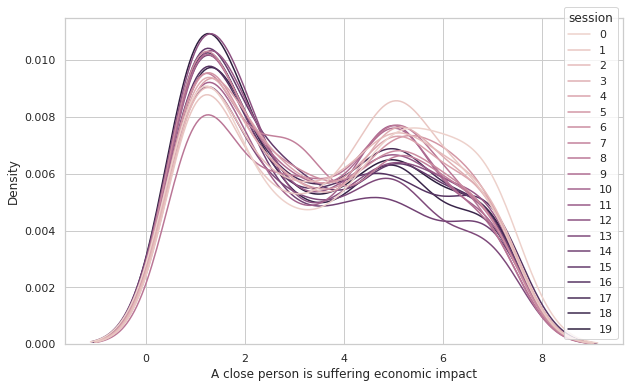

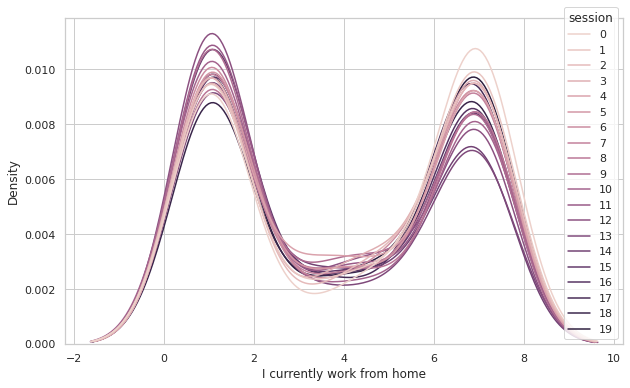

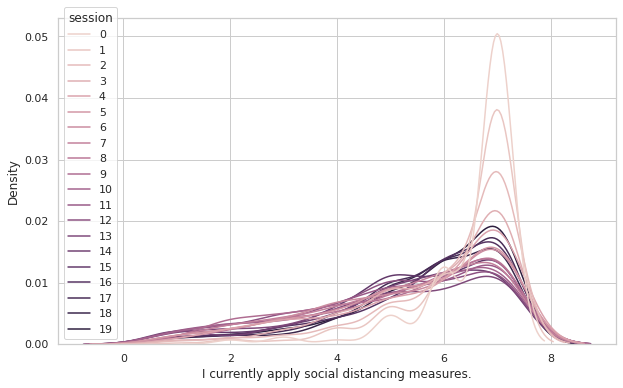

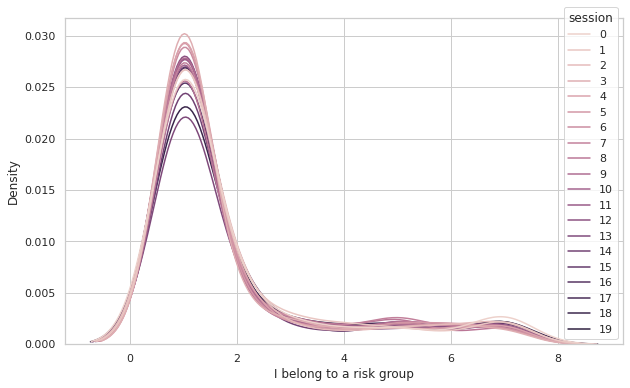

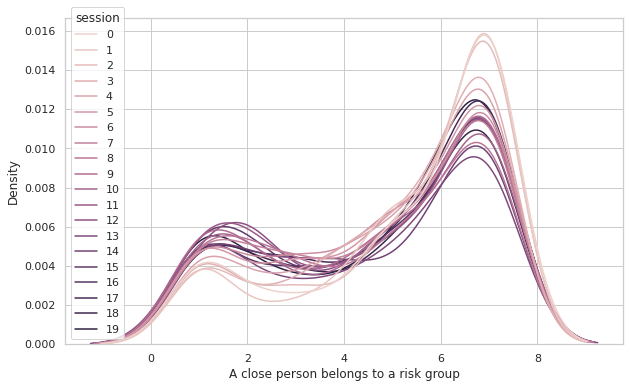

In [19]:
var = ["q6_econ_impact_me", "q6_econ_impact_closep", "q6_work_home", "q6_apply_soc_dist", "q6_risk_group", "q6_risk_group_closep"]
lbl = ["I am suffering economic impact", "A close person is suffering economic impact", "I currently work from home", "I currently apply social distancing measures.",
      "I belong to a risk group", "A close person belongs to a risk group"]
for vidx, v in enumerate(var):
    plt.figure(figsize=(10,6))
    g = sns.kdeplot(data=df, x=v, hue="session",  common_norm=True)#, multiple="fill")
    plt.xlabel(lbl[vidx]);

#### Media valence

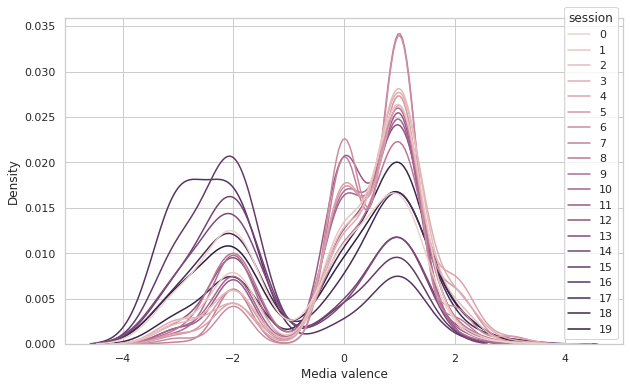

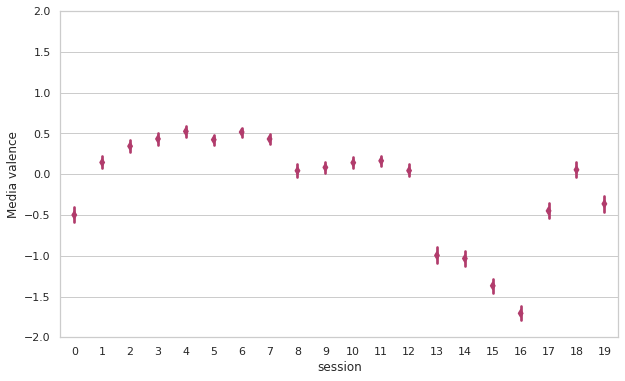

In [20]:
var = ["q6_media_valence"]
lbl = ["Media valence"]
for vidx, v in enumerate(var):
    plt.figure(figsize=(10,6))
    g = sns.kdeplot(data=df, x=v, hue="session", common_norm=True)#, multiple="fill")
    plt.xlabel(lbl[vidx]);
    
    plt.figure(figsize=(10,6))
    pal = sns.color_palette("flare")
    sns.pointplot(x="session", y=v,
                  data=df, dodge=.532, join=False, color=pal[3],
                  markers="d", scale=.75, ci=68);
    plt.ylabel("Media valence");
    plt.ylim((-2,2))

#### Estimated number of cases


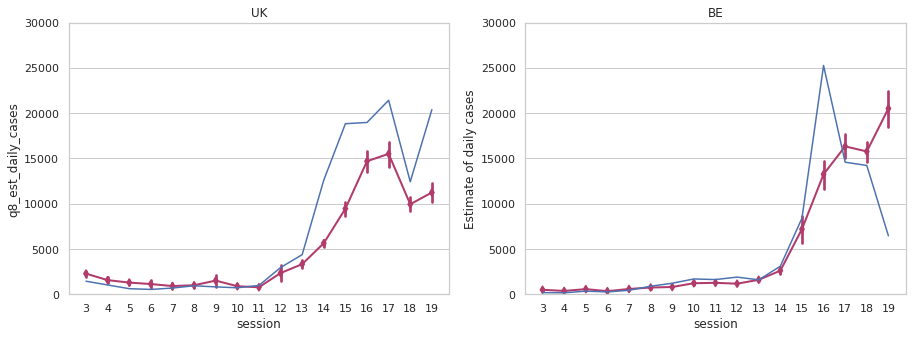

In [21]:
covcase = pd.read_csv("../../data/covid_cases_UKGER.csv")
covcase["date"] = pd.to_datetime(covcase["date"], format="%Y-%m-%d")
covcase= covcase.loc[covcase["date"].isin(dates["open_date"]),:]


fig, axs = plt.subplots(ncols=2, figsize=(15,5))
pal = sns.color_palette("flare")
iso = ["GBR", "DEU"]
for cidx,c in enumerate(["UK", "BE"]):
    tdf=df.loc[df["GROUP"]==c,["session", "PROLIFICID",  "q8_est_daily_cases"]].dropna()
    #tdf = tdf.loc[tdf["PROLIFICID"]!="5e5e83a420e3aa000c7b6c97",:] 
    
    sns.pointplot(x="session", y="q8_est_daily_cases",
                  data=tdf, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[cidx]);
    axs[cidx].set_ylim((0,30000))
    
    tc = covcase.loc[covcase["iso_code"]==iso[cidx], :].reset_index()
    tcovcase = pd.concat([tc, dates], axis=1)
    tcovcase["session"] = tcovcase.index
    tcovcase = tcovcase.drop(index=[0,1,2])
    y=np.array(tcovcase["new_cases"])
    sns.lineplot(x=np.arange(len(y)), y=y, ax=axs[cidx])

    plt.ylabel("Estimate of daily cases");
    axs[cidx].set_title(c)
    plt.ylim((0,30000))


Above (the blue line is the true number of cases on that day - will be adjusted to 7day average)

---
#### If you think back to the first survey in April 2020...

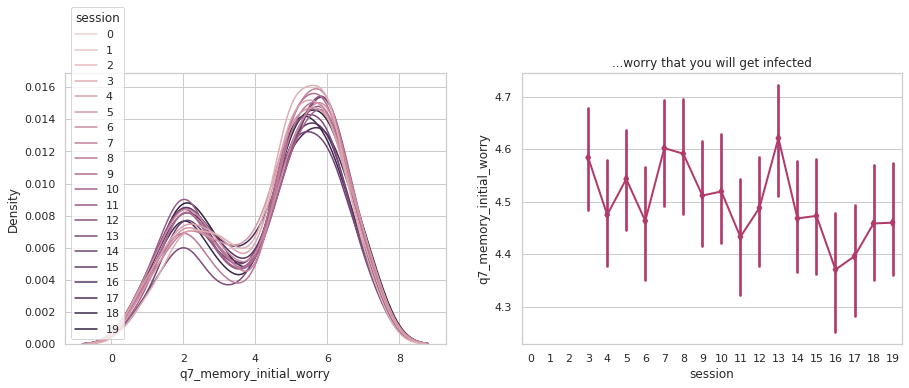

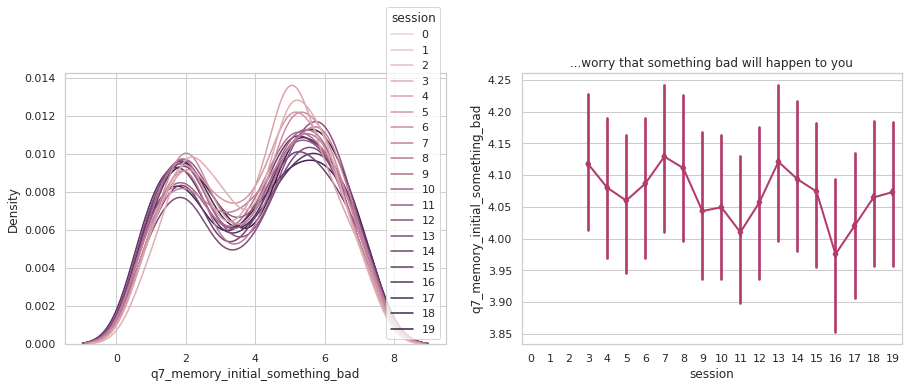

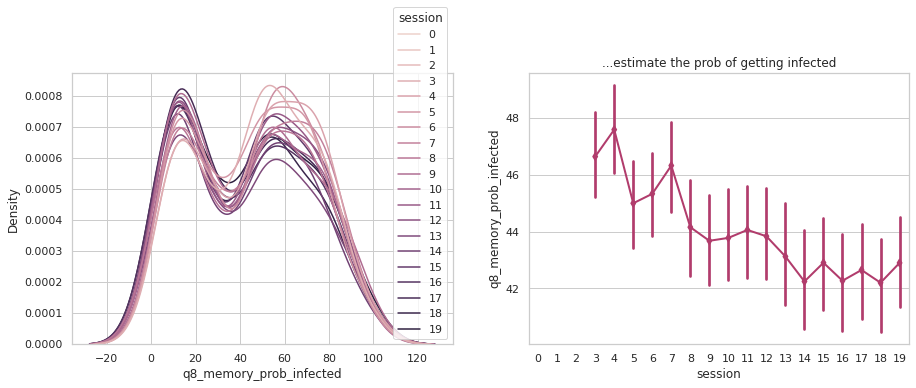

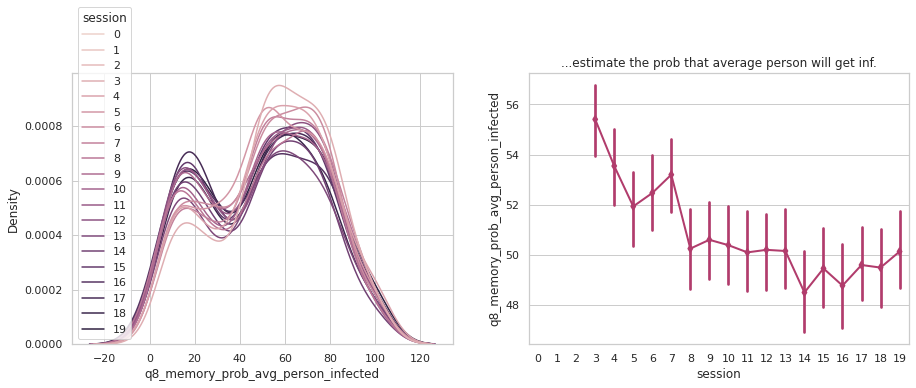

In [22]:
var = ["q7_memory_initial_worry", "q7_memory_initial_something_bad", "q8_memory_prob_infected", "q8_memory_prob_avg_person_infected"]
lbl = ["...worry that you will get infected", "...worry that something bad will happen to you", "...estimate the prob of getting infected", "...estimate the prob that average person will get inf."]
for vidx, v in enumerate(var):
    fig, axs = plt.subplots(ncols=2, figsize=(15,5))
    g = sns.kdeplot(data=df, x=v, hue="session",  common_norm=True, ax=axs[0])#, multiple="fill")
    plt.xlabel(lbl[vidx]);
    
    pal = sns.color_palette("flare")
    sns.pointplot(x="session", y=v,
                  data=df, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    plt.title(lbl[vidx]);
    #plt.ylim((-2,2))
    fig.show()

#### Do you think at least once a day about:

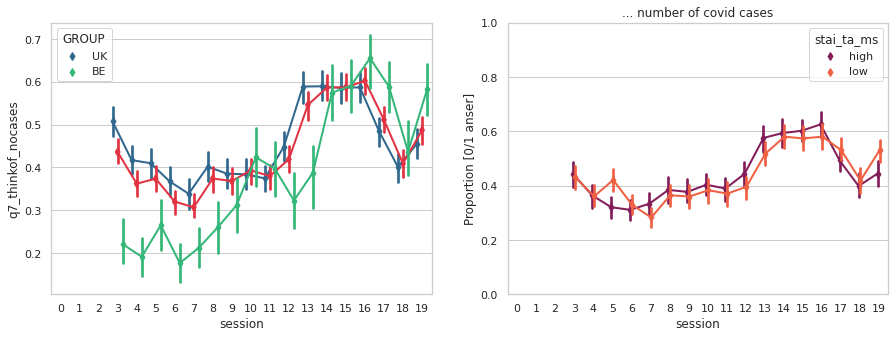

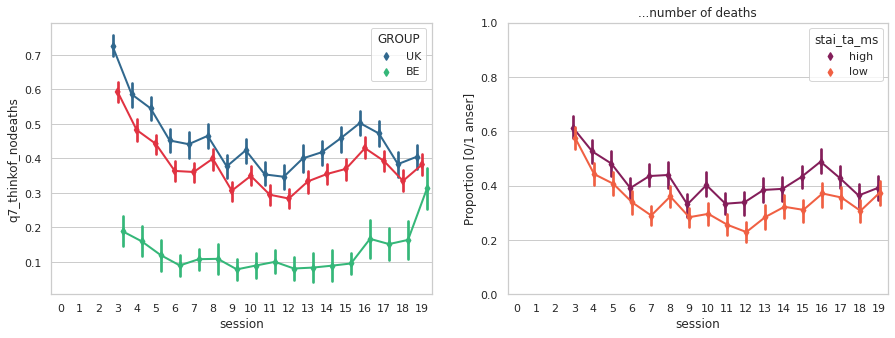

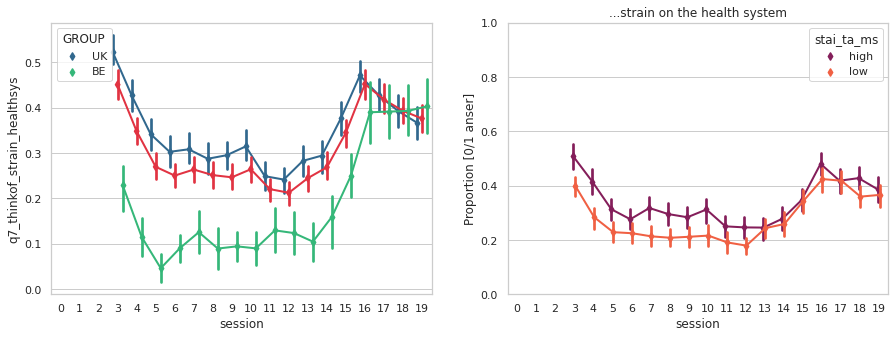

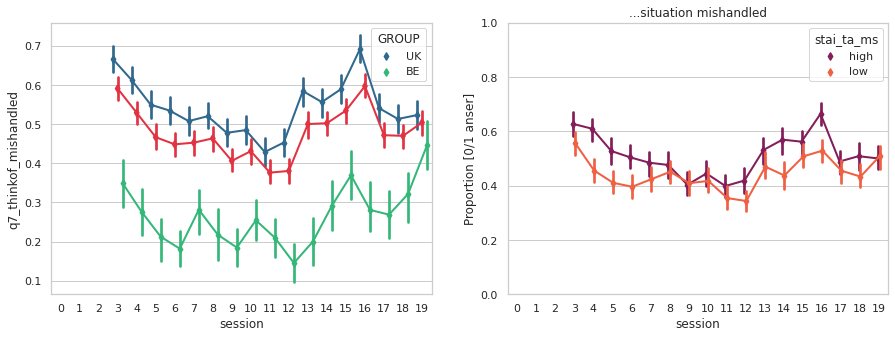

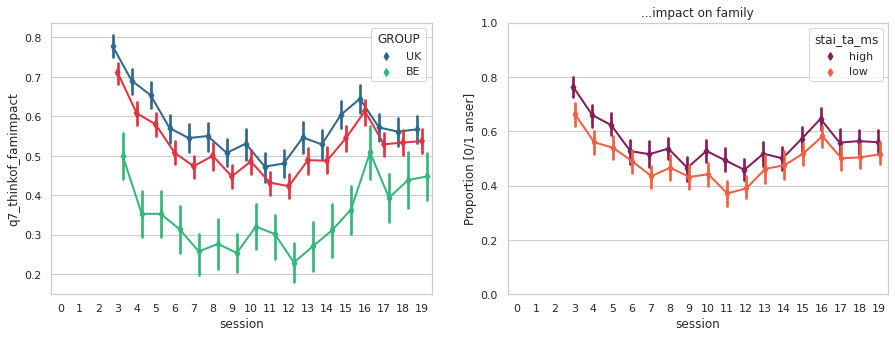

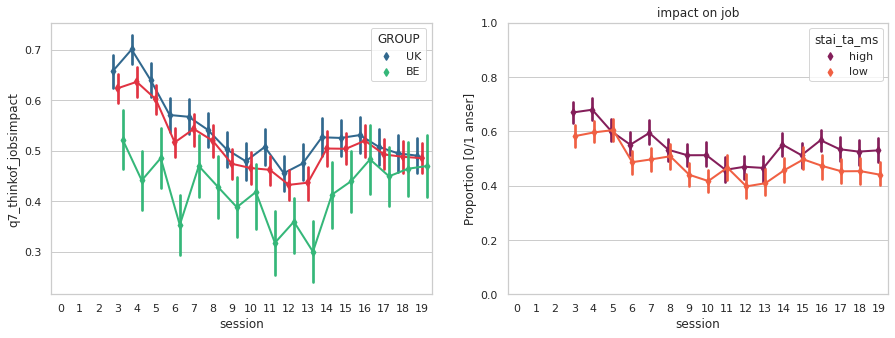

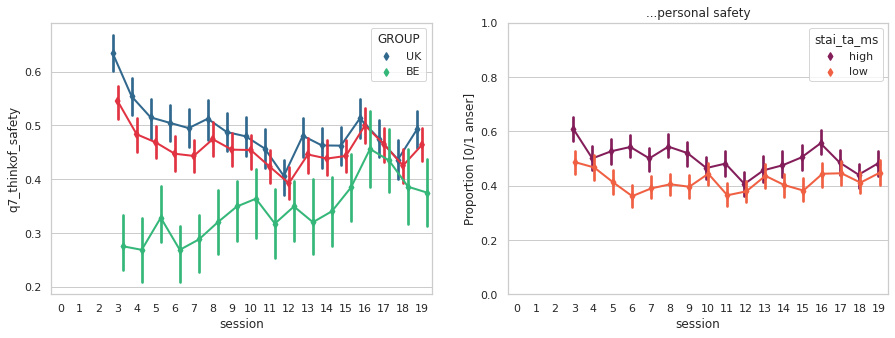

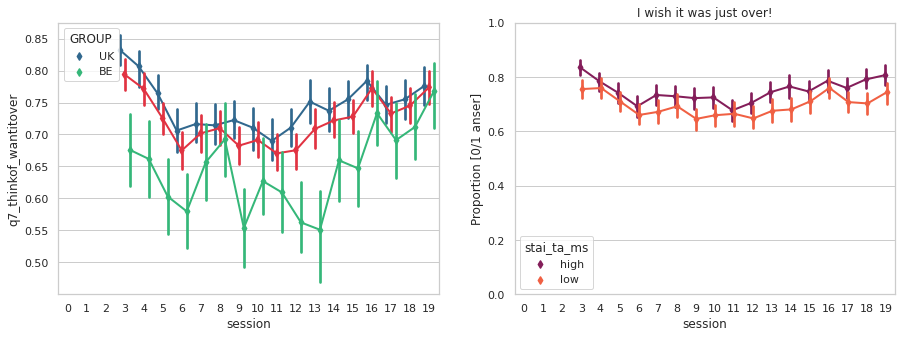

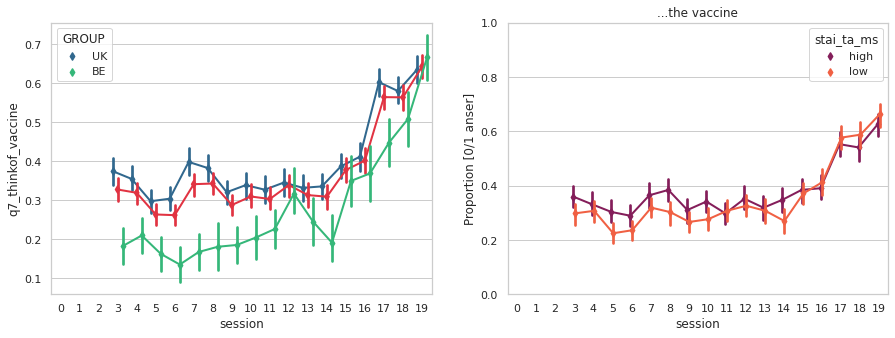

In [23]:


var = ["q7_thinkof_nocases", "q7_thinkof_nodeaths", "q7_thinkof_strain_healthsys", "q7_thinkof_mishandled", 
       "q7_thinkof_famimpact", "q7_thinkof_jobsimpact", "q7_thinkof_safety", "q7_thinkof_wantitover", "q7_thinkof_vaccine"]
lbl = ["... number of covid cases", "...number of deaths", "...strain on the health system", "...situation mishandled",
      "...impact on family", "impact on job", "...personal safety", "I wish it was just over!", "...the vaccine"]
for vidx, v in enumerate(var):
   
    #country
    fig, axs = plt.subplots(ncols=2, figsize=(15,5))
    pal = sns.color_palette("rocket")
    sns.pointplot(x="session", y=v,
                  data=df, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[0]);
    sns.pointplot(x="session", y=v, hue="GROUP",
                  data=df, dodge=.532, join=True, palette=sns.color_palette("viridis",2),
                  markers="d", scale=.75, ci=68, ax=axs[0]);
    plt.title(lbl[vidx]);
    plt.ylabel("Proportion [0/1 anser]")
    plt.ylim((0,1))
    
    #anxiety
    sns.pointplot(x="session", y=v, hue="stai_ta_ms",
                  data=df, dodge=.1, join=True, palette=sns.color_palette("rocket",2),
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    plt.title(lbl[vidx]);
    plt.ylabel("Proportion [0/1 anser]")
    plt.ylim((0,1))



#### Is there a vaccine for COVID-19?

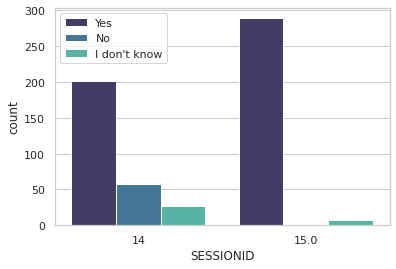

In [24]:
pal = sns.color_palette("mako",3)
g = sns.countplot(
    data=df.loc[df["SESSIONID"].isin(["14", "15.0"])], hue="q8_exists_vaccine", x="SESSIONID", palette=pal
);
plt.legend(loc="best")

#### If a widely distributed vaccine considered safe by your governent would become available, would you:

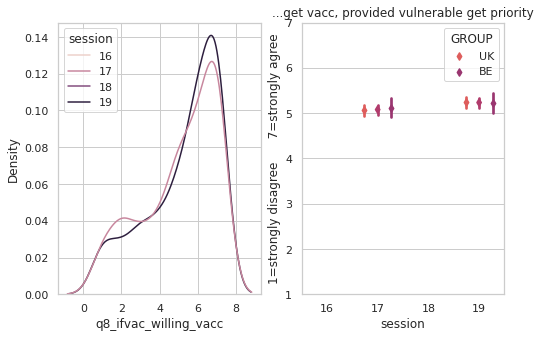

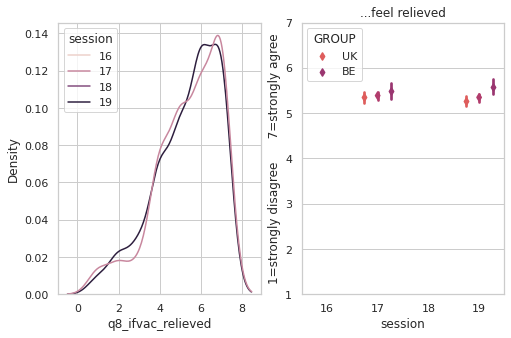

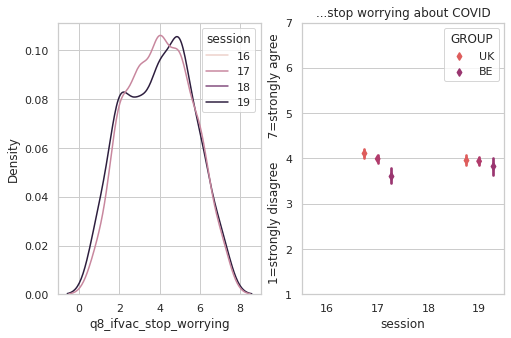

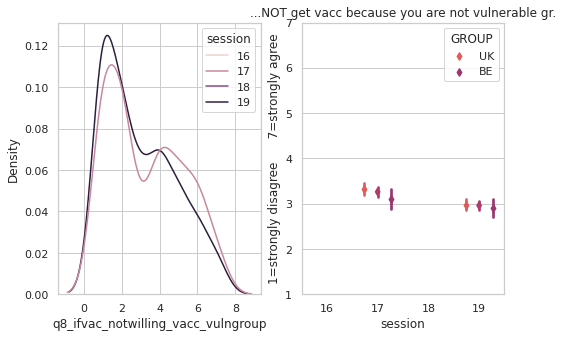

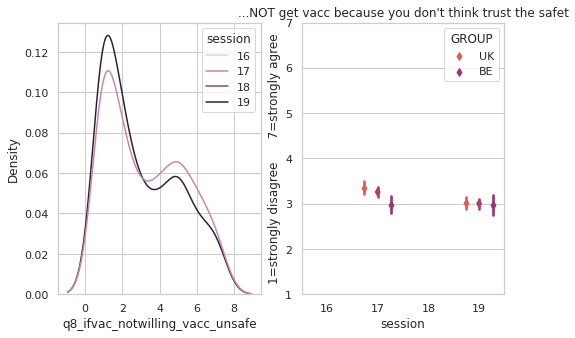

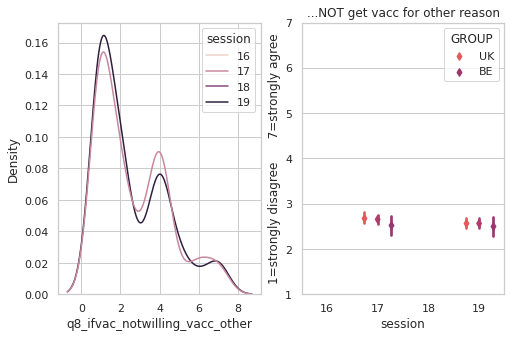

In [25]:
var = ["q8_ifvac_willing_vacc", "q8_ifvac_relieved", "q8_ifvac_stop_worrying", "q8_ifvac_notwilling_vacc_vulngroup", "q8_ifvac_notwilling_vacc_unsafe", "q8_ifvac_notwilling_vacc_other"]
lbl = ["...get vacc, provided vulnerable get priority", "...feel relieved", "...stop worrying about COVID", "...NOT get vacc because you are not vulnerable gr.", 
       "...NOT get vacc because you don't think trust the safet", "...NOT get vacc for other reason"]
for vidx, v in enumerate(var):
    fig, axs = plt.subplots(ncols=2, figsize=(8,5))
    cdf=df.loc[df["session"]>15,:]
    g = sns.kdeplot(data=cdf, x=v, hue="session",  common_norm=True, ax=axs[0])#, multiple="fill")
    plt.xlabel(lbl[vidx]);
    
    
    pal = sns.color_palette("flare")
    sns.pointplot(x="session", y=v,
                  data=cdf, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    sns.pointplot(x="session", y=v, hue="GROUP",
                  data=cdf, dodge=.532, join=True, palette=sns.color_palette("flare",2),
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    plt.ylabel("1=strongly disagree      7=strongly agree")
    plt.title(lbl[vidx]);
    plt.ylim((1,7))
    fig.show()

### COVID Section II: Affective measures

#### Worries

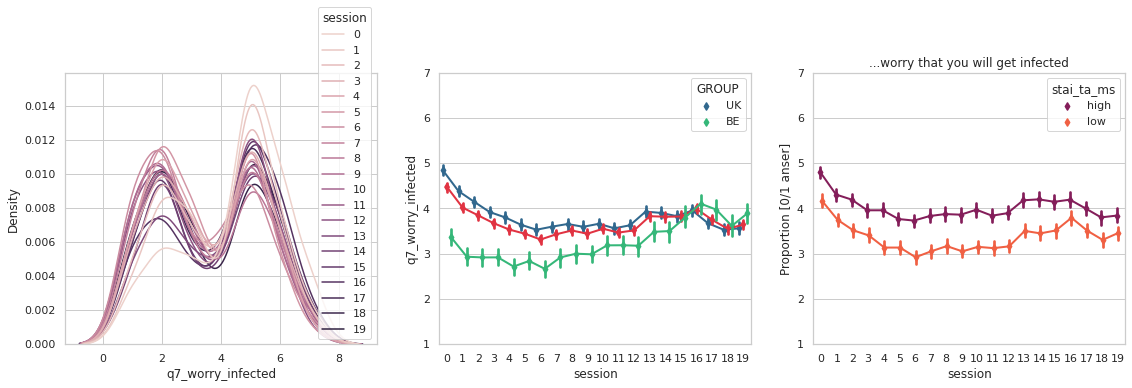

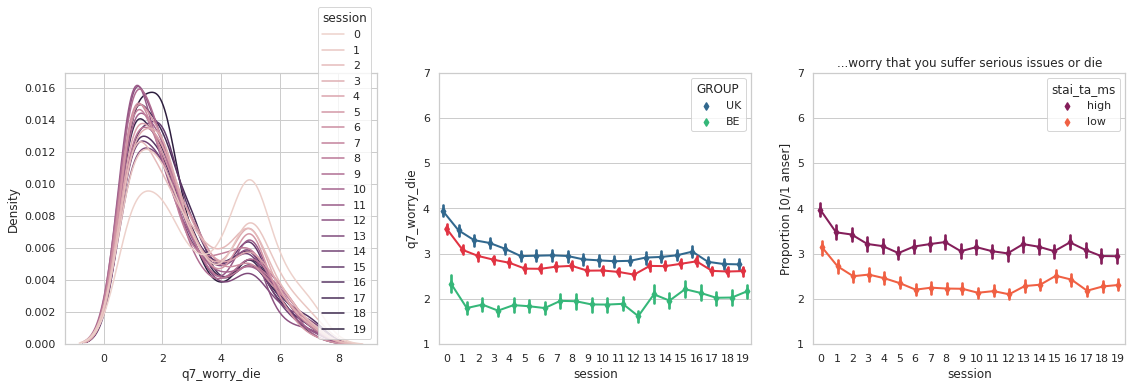

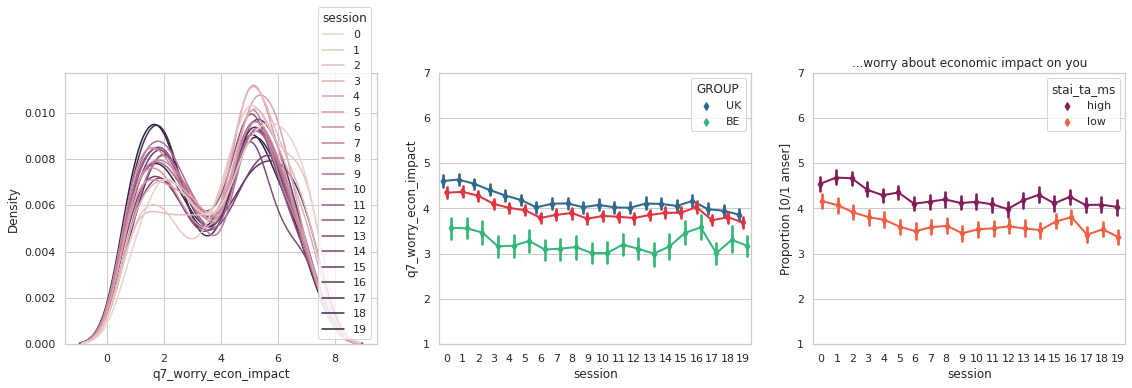

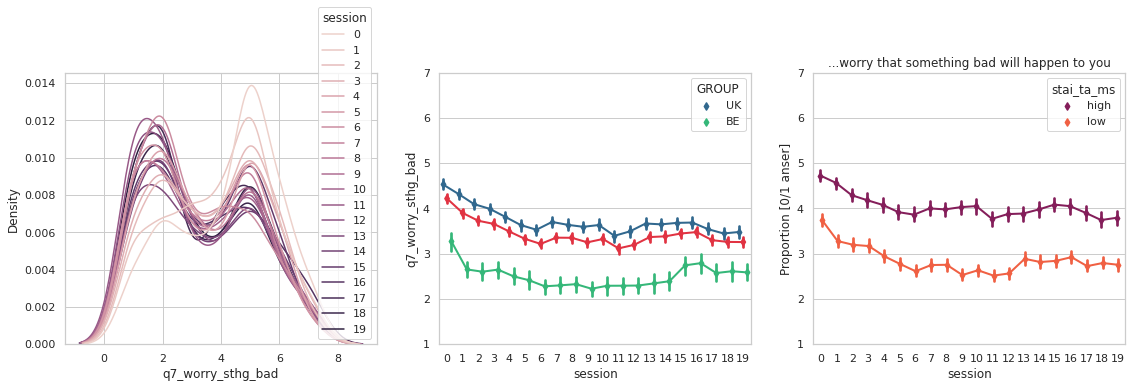

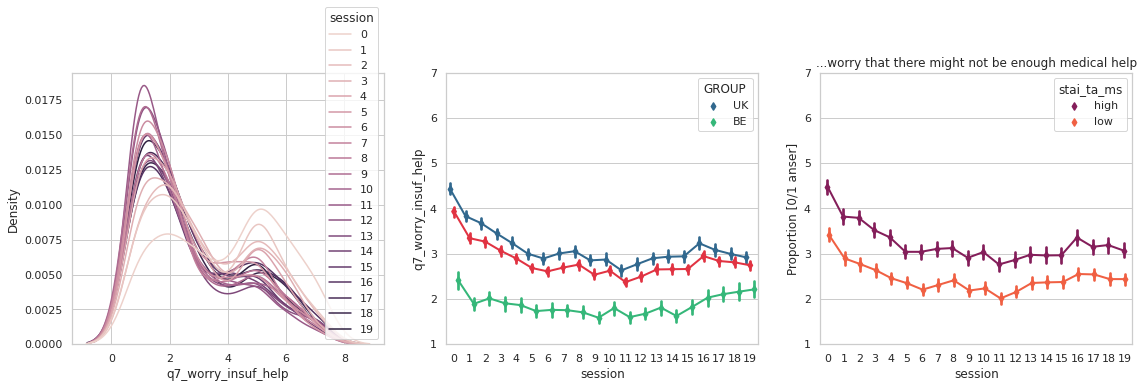

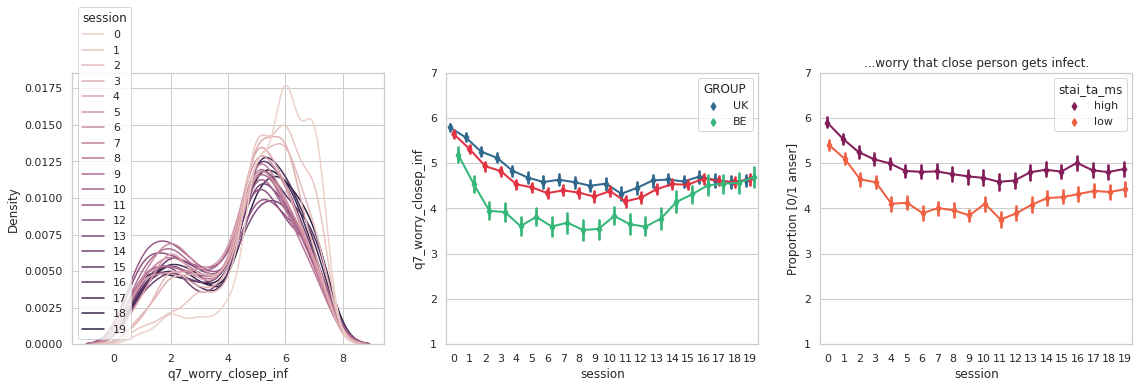

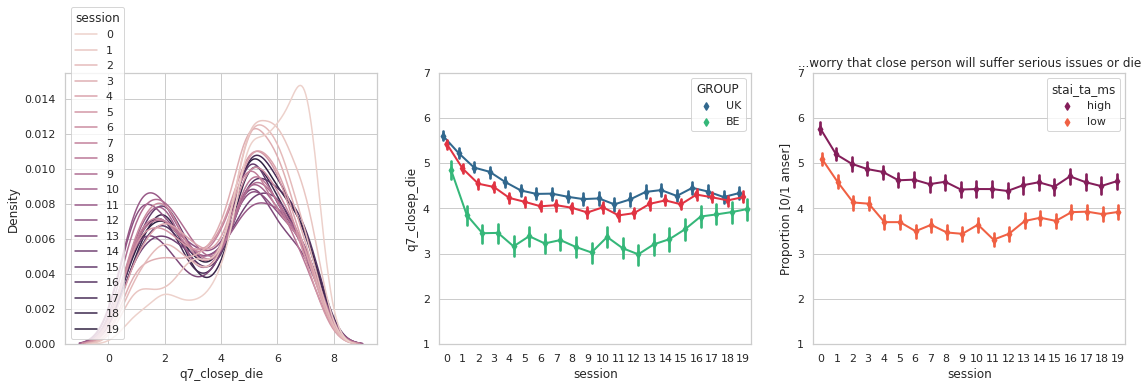

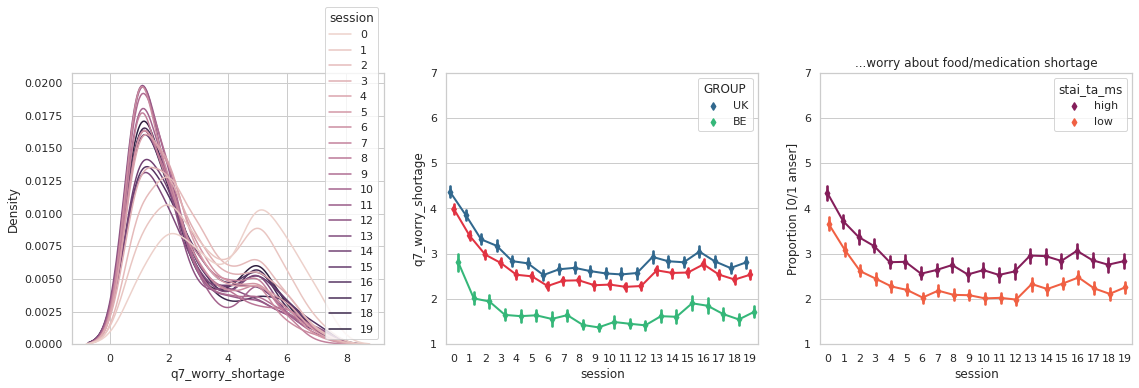

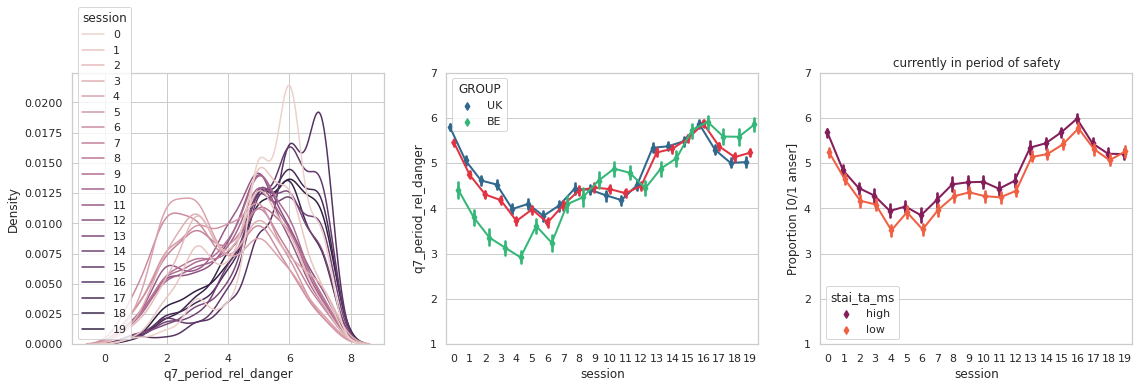

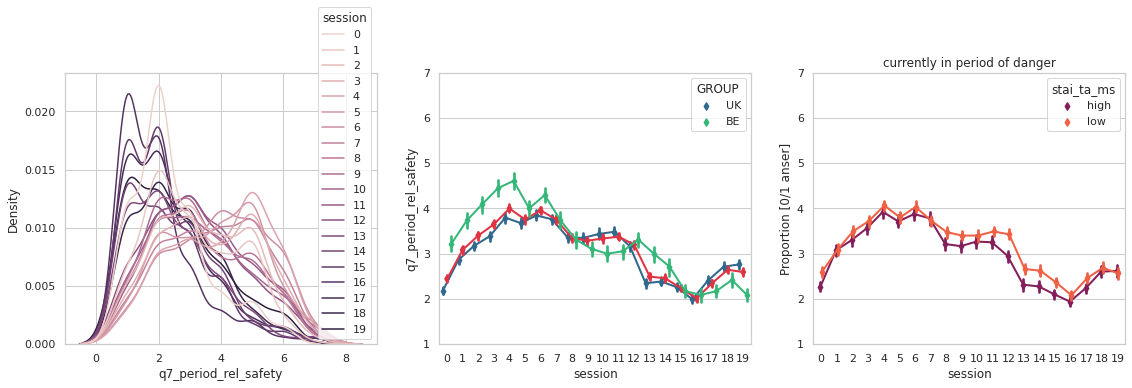

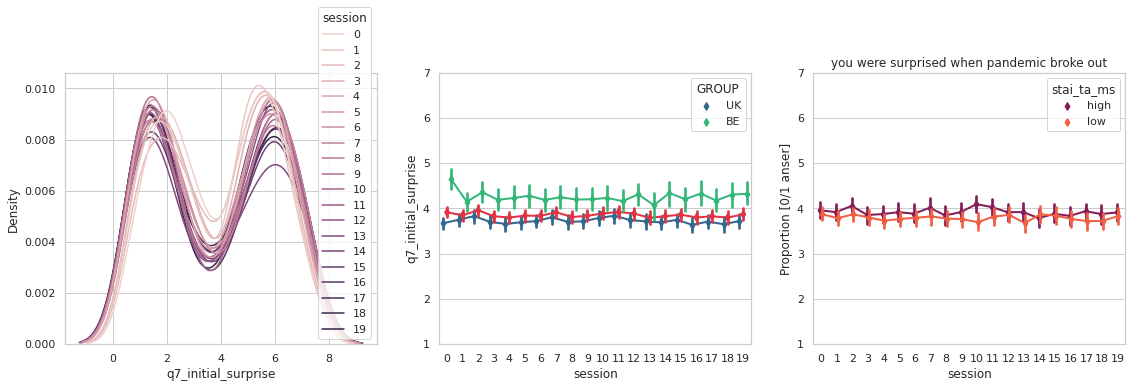

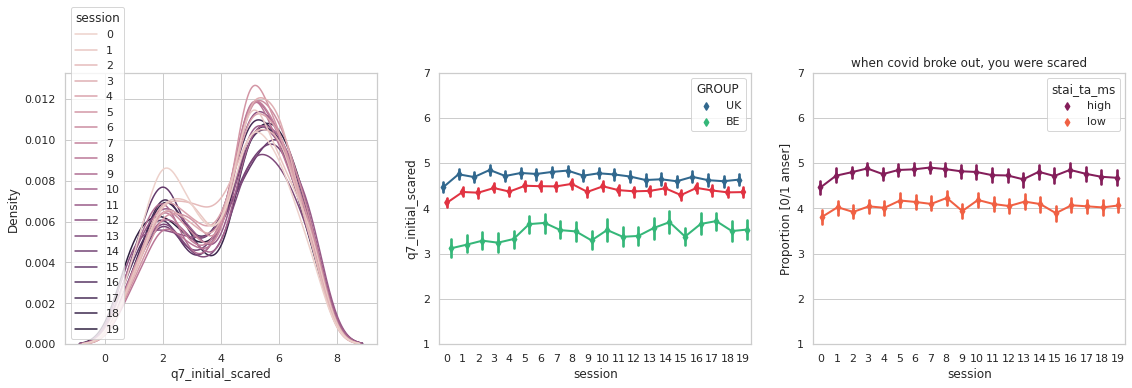

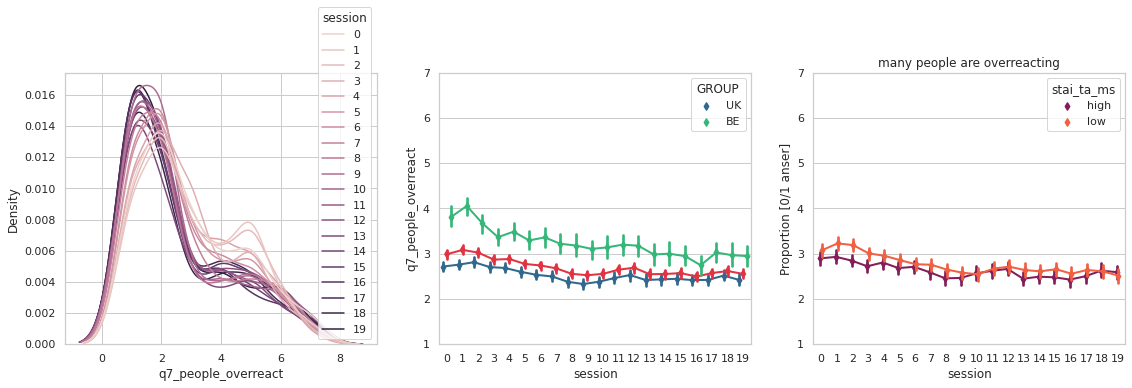

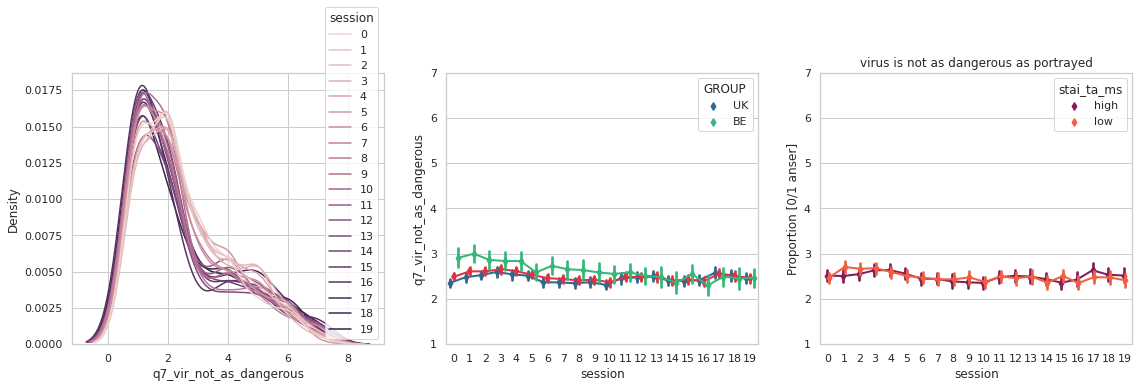

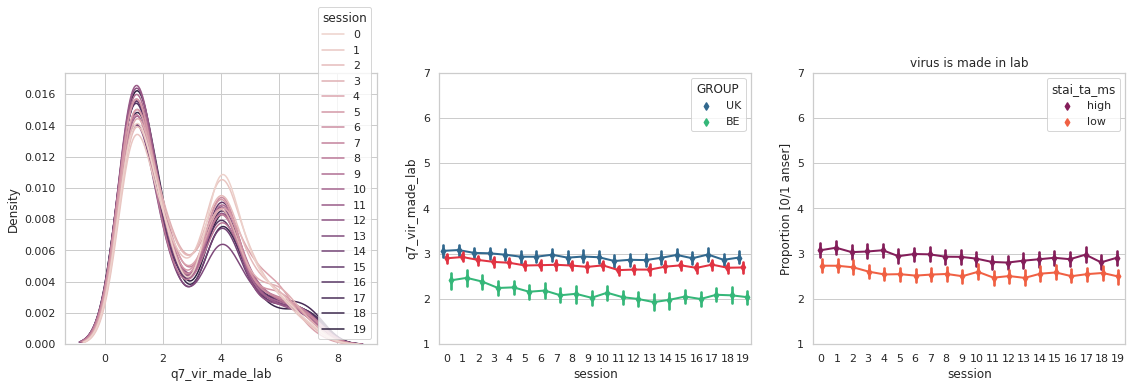

In [26]:
var = ["q7_worry_infected", "q7_worry_die", "q7_worry_econ_impact","q7_worry_sthg_bad", "q7_worry_insuf_help", "q7_worry_closep_inf", 
       "q7_closep_die", "q7_worry_shortage", "q7_period_rel_danger", "q7_period_rel_safety", "q7_initial_surprise", "q7_initial_scared", 
       "q7_people_overreact", "q7_vir_not_as_dangerous", "q7_vir_made_lab"]

lbl = ["...worry that you will get infected", "...worry that you suffer serious issues or die", "...worry about economic impact on you", 
       "...worry that something bad will happen to you", "...worry that there might not be enough medical help", "...worry that close person gets infect.",
       "...worry that close person will suffer serious issues or die", "...worry about food/medication shortage", "currently in period of safety",
      "currently in period of danger", "you were surprised when pandemic broke out", "when covid broke out, you were scared", "many people are overreacting",
      "virus is not as dangerous as portrayed", "virus is made in lab"]
for vidx, v in enumerate(var):
    fig, axs = plt.subplots(ncols=3, figsize=(19,5))
    g = sns.kdeplot(data=df, x=v, hue="session",  common_norm=True, ax=axs[0])#, multiple="fill")
    plt.xlabel(lbl[vidx]);
    
    pal = sns.color_palette("rocket")
    sns.pointplot(x="session", y=v,
                  data=df, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    sns.pointplot(x="session", y=v, hue="GROUP",
                  data=df, dodge=.532, join=True, palette=sns.color_palette("viridis",2),
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    plt.title(lbl[vidx]);
    axs[1].set_ylim((1,7))
    
    #anxiety
    sns.pointplot(x="session", y=v, hue="stai_ta_ms",
                  data=df, dodge=.1, join=True, palette=sns.color_palette("rocket",2),
                  markers="d", scale=.75, ci=68, ax=axs[2]);
    plt.title(lbl[vidx]);
    plt.ylabel("")
    plt.ylim((1,7))
    

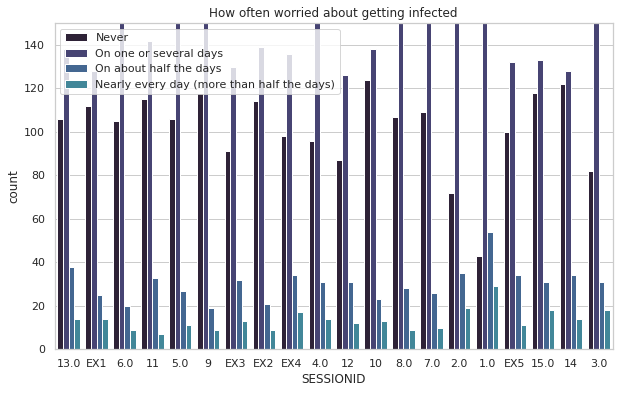

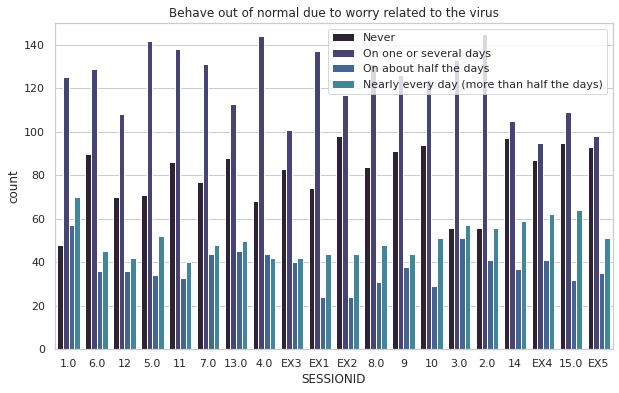

In [27]:
var = ["q7_inf_worry_frequency","q7_diff_beh_freq"]
lbl = ["How often worried about getting infected","Behave out of normal due to worry related to the virus"]
pal = sns.color_palette("mako")
order = ["Never", "On one or several days", "On about half the days", "Nearly every day (more than half the days)"];
val = [0,1,2,3]

for vidx, v in enumerate(var):
    df["q7_freq_help"] = df[v].replace({"Never":0,"On one or several days":1, "On about half the days":2, "Nearly every day (more than half the days)":3})
    cdf = df.sort_values("q7_freq_help")
    plt.figure(figsize=(10,6))
    g = sns.countplot(
        data=cdf, hue=v, x="SESSIONID", palette=pal
    );
    plt.title(lbl[vidx]);
    plt.legend(loc="best")
    plt.ylim((0,150))

#### Avoidance and anxiety

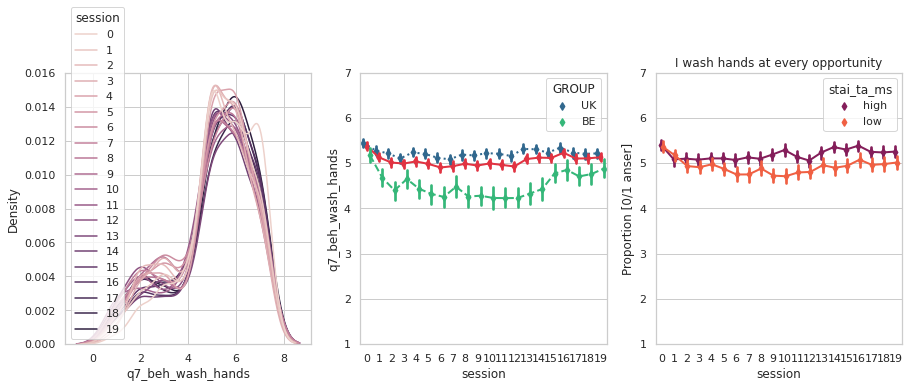

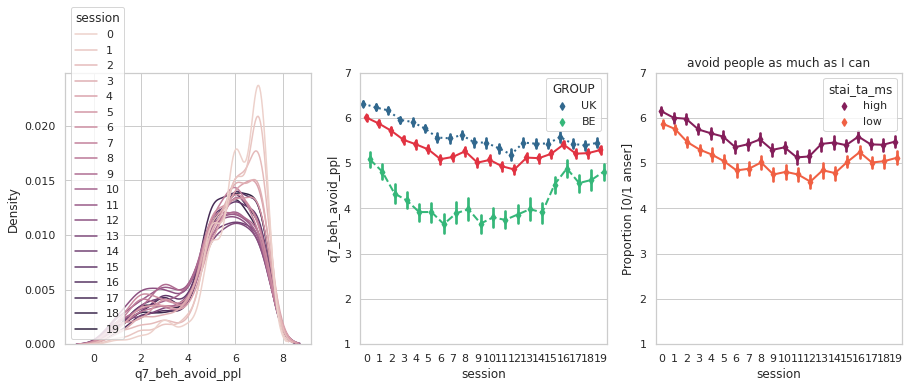

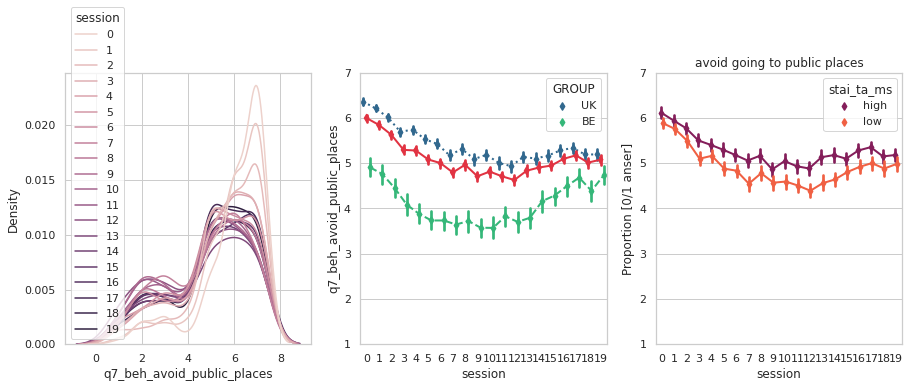

In [28]:
var = ["q7_beh_wash_hands", "q7_beh_avoid_ppl", "q7_beh_avoid_public_places"]

lbl = ["I wash hands at every opportunity", "avoid people as much as I can", "avoid going to public places", 
]
for vidx, v in enumerate(var):
    fig, axs = plt.subplots(ncols=3, figsize=(15,5))
    g = sns.kdeplot(data=df, x=v, hue="session",  common_norm=True, ax=axs[0])#, multiple="fill")
    plt.xlabel(lbl[vidx]);
    
    pal = sns.color_palette("rocket")
    sns.pointplot(x="session", y=v,
                  data=df, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    sns.pointplot(x="session", y=v, hue="GROUP",
                  data=df, dodge=.532, join=True, palette=sns.color_palette("viridis",2),
                  markers="d", scale=.75, ci=68, ax=axs[1], linestyles=[":", "--"]);
    plt.title(lbl[vidx]);
    axs[1].set_ylim((1,7))
    
    #anxiety
    sns.pointplot(x="session", y=v, hue="stai_ta_ms",
                  data=df, dodge=.1, join=True, palette=sns.color_palette("rocket",2),
                  markers="d", scale=.75, ci=68, ax=axs[2]);
    plt.title(lbl[vidx]);
    plt.ylabel("Proportion [0/1 anser]")
    plt.ylim((1,7))

#### I feel anxious about...

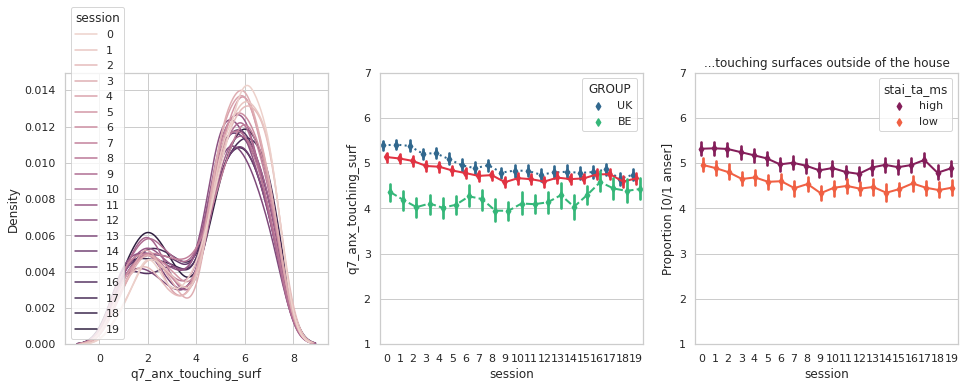

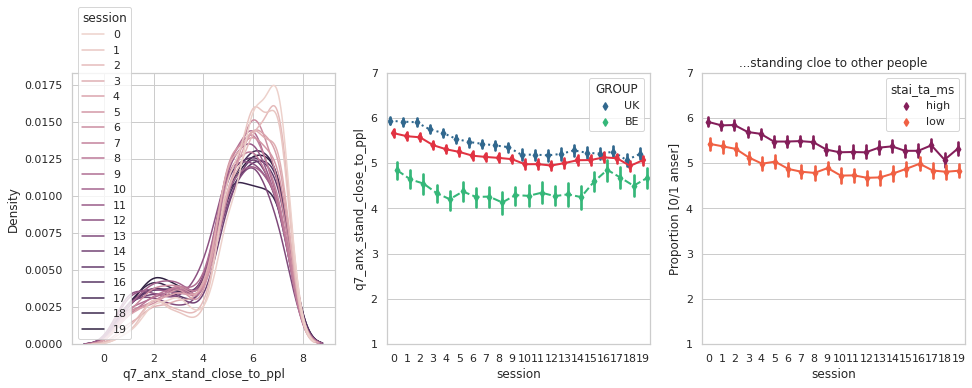

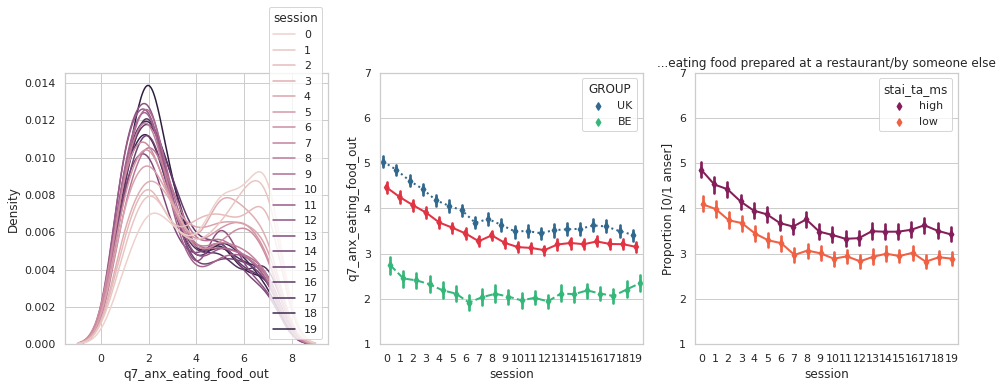

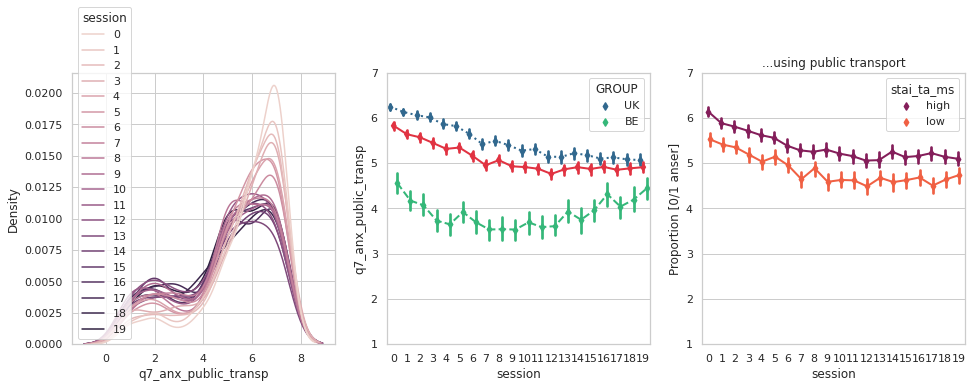

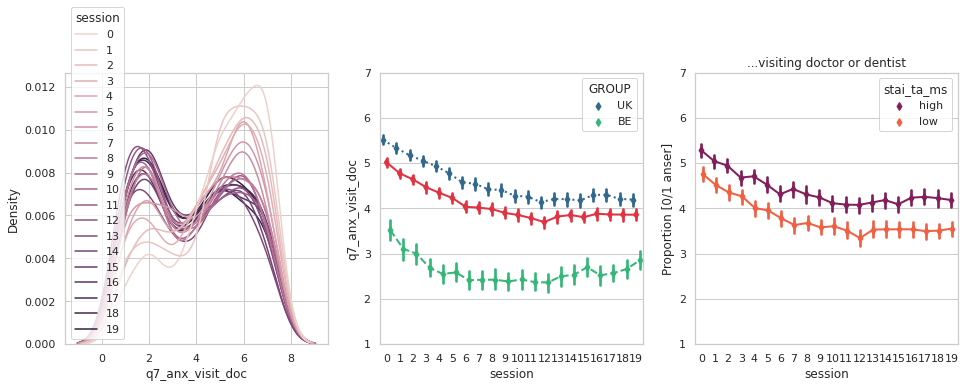

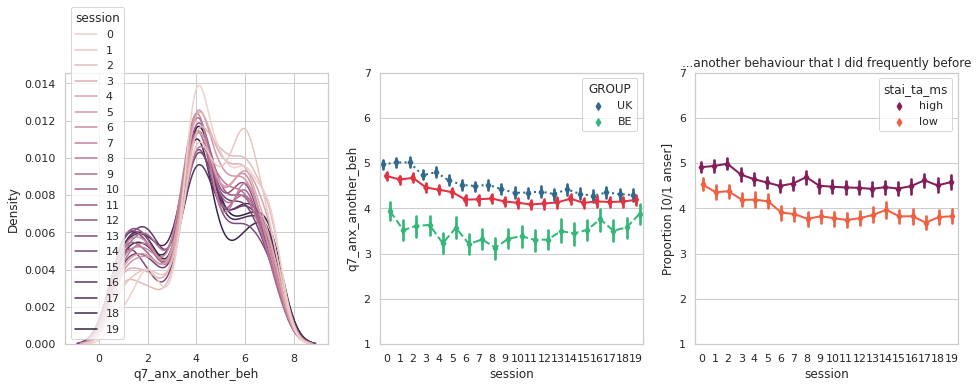

In [29]:
var = ["q7_anx_touching_surf", "q7_anx_stand_close_to_ppl", "q7_anx_eating_food_out", "q7_anx_public_transp", "q7_anx_visit_doc", "q7_anx_another_beh"]

lbl = ["...touching surfaces outside of the house", "...standing cloe to other people", "...eating food prepared at a restaurant/by someone else",
       "...using public transport", "...visiting doctor or dentist", "...another behaviour that I did frequently before"]
for vidx, v in enumerate(var):
    fig, axs = plt.subplots(ncols=3, figsize=(16,5))
    g = sns.kdeplot(data=df, x=v, hue="session",  common_norm=True, ax=axs[0])#, multiple="fill")
    plt.xlabel(lbl[vidx]);
    
    pal = sns.color_palette("rocket")
    sns.pointplot(x="session", y=v,
                  data=df, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    sns.pointplot(x="session", y=v, hue="GROUP",
                  data=df, dodge=.532, join=True, palette=sns.color_palette("viridis",2),
                  markers="d", scale=.75, ci=68, ax=axs[1], linestyles=[":", "--"]);
    plt.title(lbl[vidx]);
    axs[1].set_ylim((1,7))
    
    #anxiety
    sns.pointplot(x="session", y=v, hue="stai_ta_ms",
                  data=df, dodge=.1, join=True, palette=sns.color_palette("rocket",2),
                  markers="d", scale=.75, ci=68, ax=axs[2]);
    plt.title(lbl[vidx]);
    plt.ylabel("Proportion [0/1 anser]")
    plt.ylim((1,7))

#### Attitudes

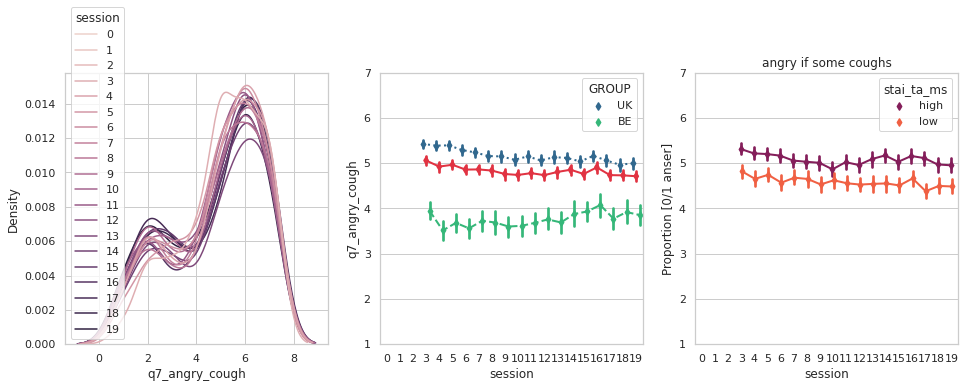

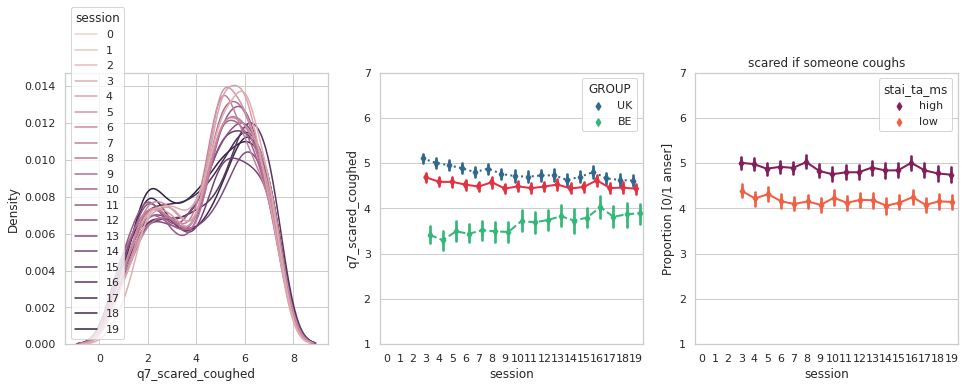

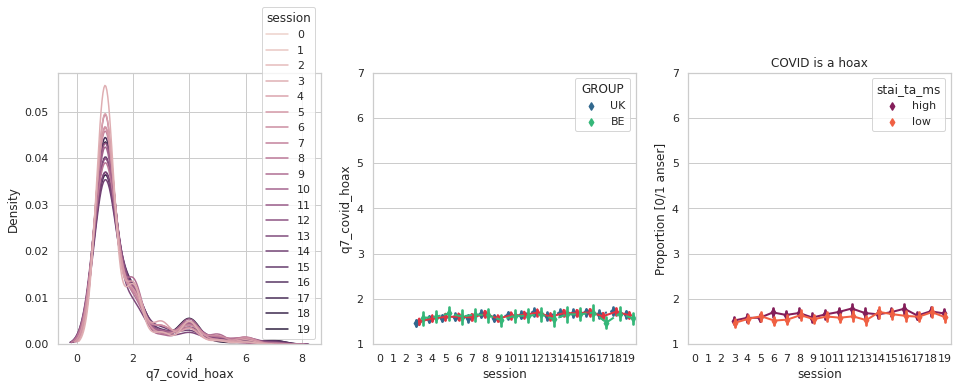

In [30]:
var = ["q7_angry_cough",  "q7_scared_coughed", "q7_covid_hoax"]

lbl = ["angry if some coughs", "scared if someone coughs", "COVID is a hoax"]
for vidx, v in enumerate(var):
    fig, axs = plt.subplots(ncols=3, figsize=(16,5))
    g = sns.kdeplot(data=df, x=v, hue="session",  common_norm=True, ax=axs[0])#, multiple="fill")
    plt.xlabel(lbl[vidx]);
    
    pal = sns.color_palette("rocket")
    sns.pointplot(x="session", y=v,
                  data=df, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    sns.pointplot(x="session", y=v, hue="GROUP",
                  data=df, dodge=.532, join=True, palette=sns.color_palette("viridis",2),
                  markers="d", scale=.75, ci=68, ax=axs[1], linestyles=[":", "--"]);
    plt.title(lbl[vidx]);
    axs[1].set_ylim((1,7))
    
    #anxiety
    sns.pointplot(x="session", y=v, hue="stai_ta_ms",
                  data=df, dodge=.1, join=True, palette=sns.color_palette("rocket",2),
                  markers="d", scale=.75, ci=68, ax=axs[2]);
    plt.title(lbl[vidx]);
    plt.ylabel("Proportion [0/1 anser]")
    plt.ylim((1,7))

### COVID Section III: Estimates

#### Estimate objetive probability of 

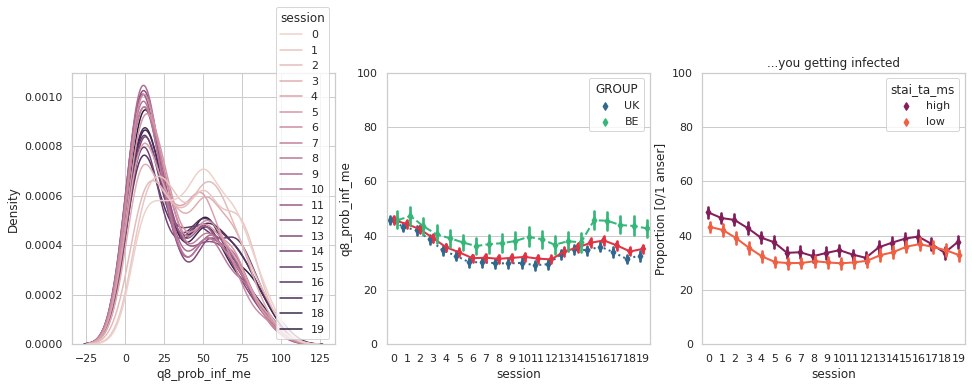

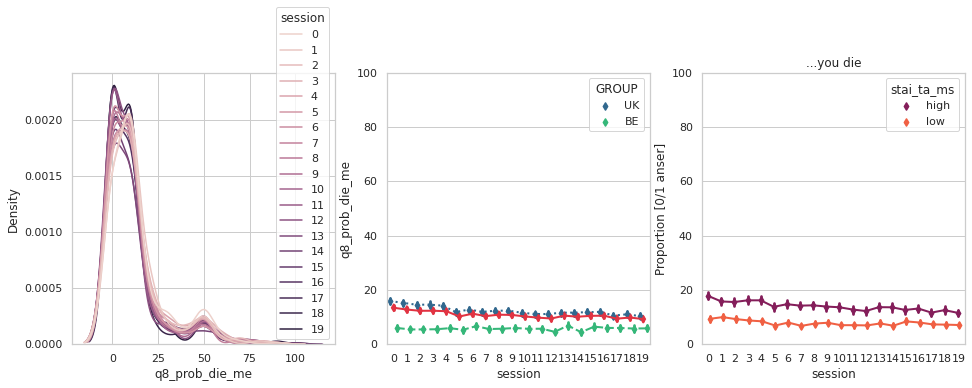

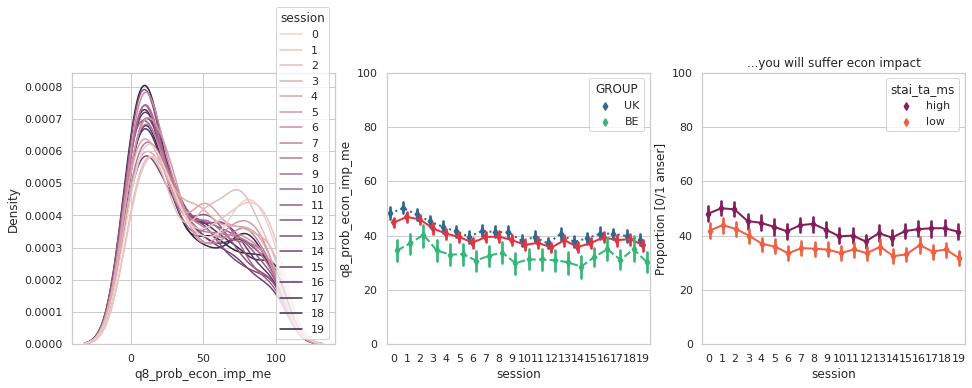

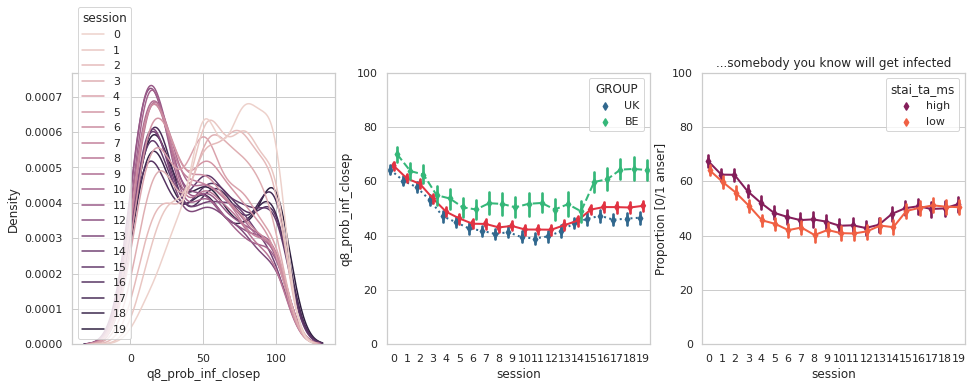

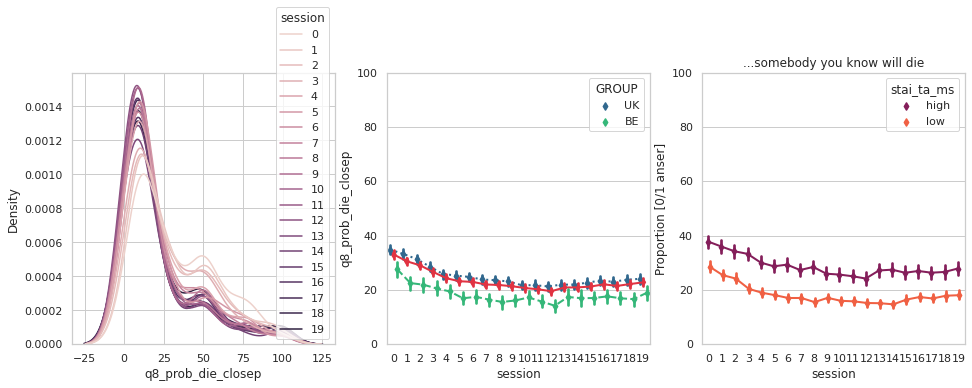

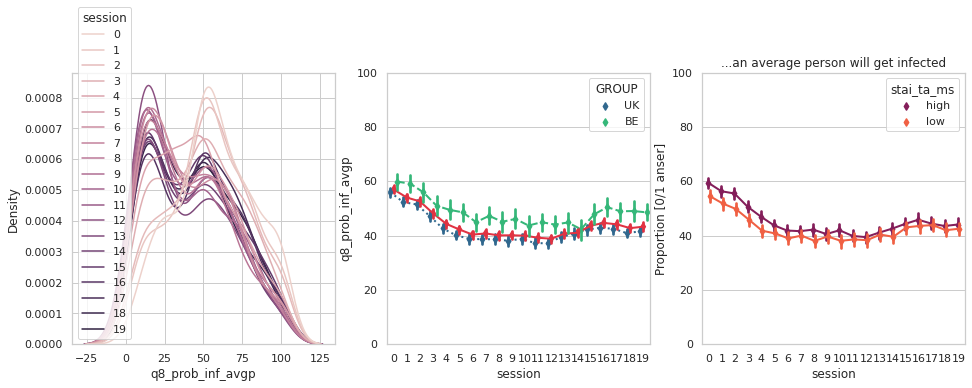

In [31]:
var = ["q8_prob_inf_me", "q8_prob_die_me", "q8_prob_econ_imp_me", "q8_prob_inf_closep", "q8_prob_die_closep", "q8_prob_inf_avgp"]

lbl = ["...you getting infected", "...you die", "...you will suffer econ impact", "...somebody you know will get infected", "...somebody you know will die", "...an average person will get infected"]
for vidx, v in enumerate(var):
    fig, axs = plt.subplots(ncols=3, figsize=(16,5))
    g = sns.kdeplot(data=df, x=v, hue="session",  common_norm=True, ax=axs[0])#, multiple="fill")
    plt.xlabel(lbl[vidx]);
    
    pal = sns.color_palette("rocket")
    sns.pointplot(x="session", y=v,
                  data=df, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    sns.pointplot(x="session", y=v, hue="GROUP",
                  data=df, dodge=.532, join=True, palette=sns.color_palette("viridis",2),
                  markers="d", scale=.75, ci=68, ax=axs[1], linestyles=[":", "--"]);
    plt.title(lbl[vidx]);
    
    axs[1].set_ylim((0,100))
    
    #anxiety
    sns.pointplot(x="session", y=v, hue="stai_ta_ms",
                  data=df, dodge=.1, join=True, palette=sns.color_palette("rocket",2),
                  markers="d", scale=.75, ci=68, ax=axs[2]);
    plt.title(lbl[vidx]);
    plt.ylabel("Proportion [0/1 anser]")
    plt.ylim((0,100))

#### Infected self vs known vs other

(0.0, 100.0)

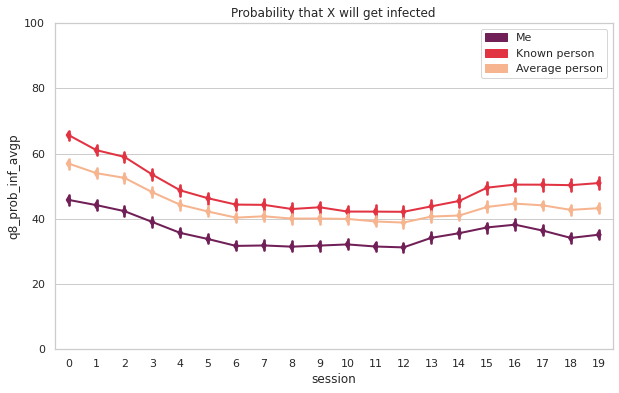

In [32]:
var = ["q8_prob_inf_me", "q8_prob_die_me", "q8_prob_econ_imp_me", "q8_prob_inf_closep", "q8_prob_die_closep", "q8_prob_inf_avgp"]

lbl = ["...you getting infected", "...you die", "...you will suffer econ impact", "...somebody you know will get infected", "...somebody you know will die", "...an average person will get infected"]

plt.figure(figsize=(10,6))
pal = sns.color_palette("rocket")
sns.pointplot(x="session", y="q8_prob_inf_me",
              data=df, dodge=.532, join=True, color=pal[1],
              markers="d", scale=.75, ci=68);
sns.pointplot(x="session", y="q8_prob_inf_closep",
              data=df, dodge=.532, join=True, color=pal[3],
              markers="d", scale=.75, ci=68);
sns.pointplot(x="session", y="q8_prob_inf_avgp",
              data=df, dodge=.532, join=True, color=pal[5],
              markers="d", scale=.75, ci=68);

plt.title("Probability that X will get infected");
p1 = mpatches.Patch(color=pal[1], label="Me");
p2 = mpatches.Patch(color=pal[3], label="Known person");
p3= mpatches.Patch(color=pal[5], label="Average person");
plt.legend(handles=[p1,p2, p3]);
plt.ylim((0, 100))


#### Expected end of pandemic

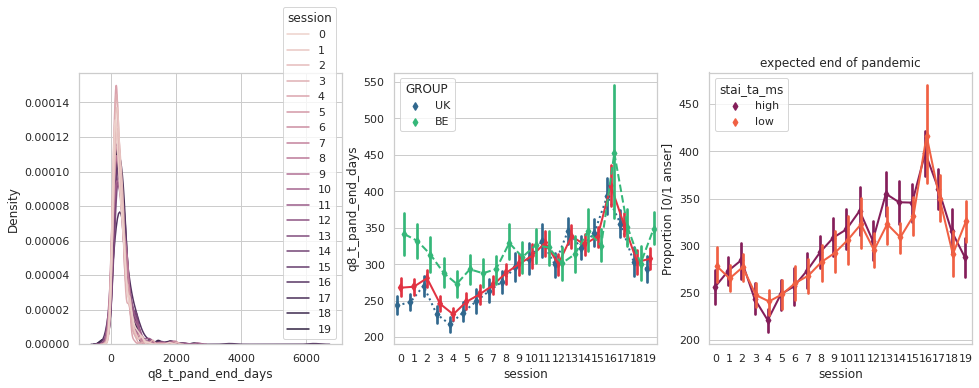

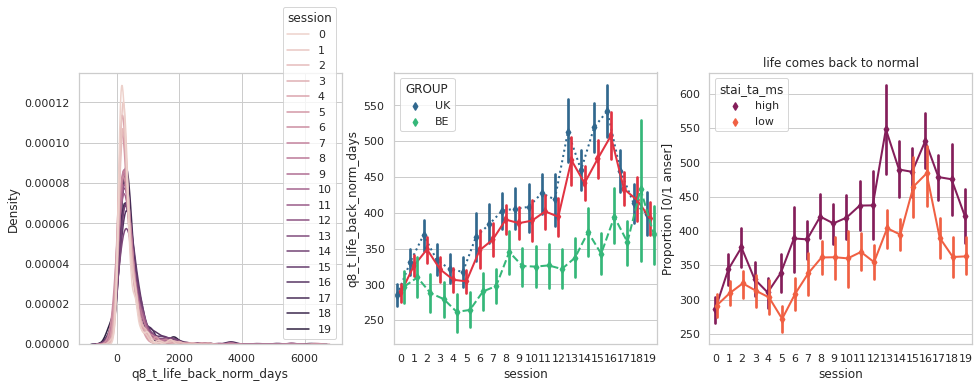

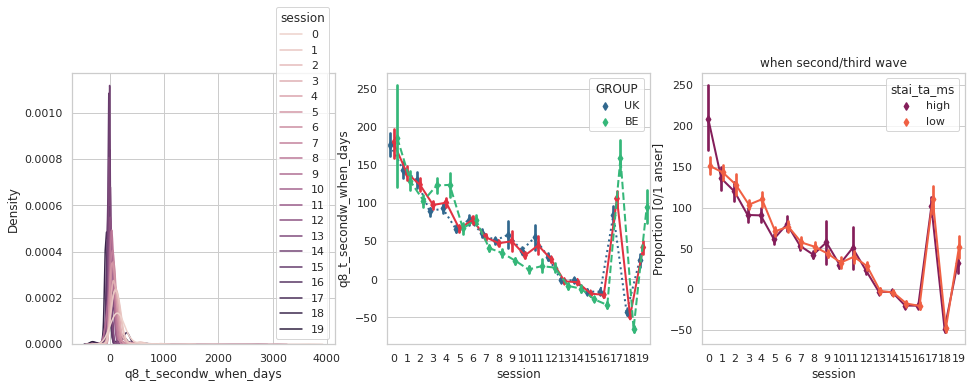

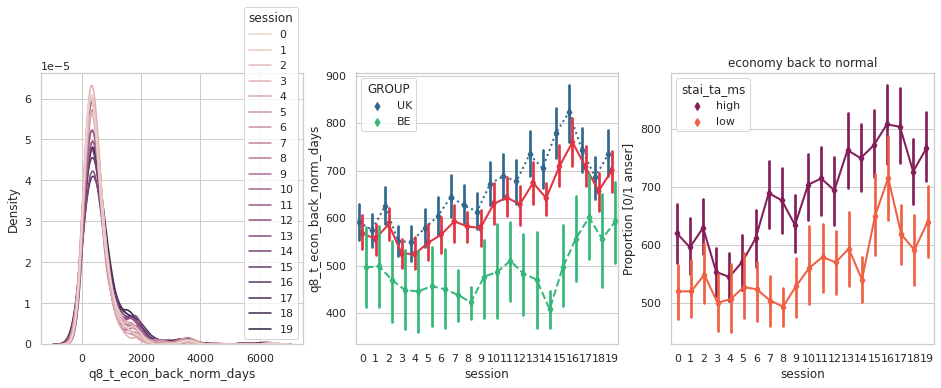

In [33]:
var = ["q8_t_pand_end_days", "q8_t_life_back_norm_days", "q8_t_secondw_when_days", "q8_t_econ_back_norm_days"]

lbl = ["expected end of pandemic", "life comes back to normal", "when second/third wave", "economy back to normal"]
for vidx, v in enumerate(var):
    fig, axs = plt.subplots(ncols=3, figsize=(16,5))
    g = sns.kdeplot(data=df, x=v, hue="session",  common_norm=True, ax=axs[0])#, multiple="fill")
    plt.xlabel(lbl[vidx]);
    
    pal = sns.color_palette("rocket")
    sns.pointplot(x="session", y=v,
                  data=df, dodge=.532, join=True, color=pal[3],
                  markers="d", scale=.75, ci=68, ax=axs[1]);
    sns.pointplot(x="session", y=v, hue="GROUP",
                  data=df, dodge=.532, join=True, palette=sns.color_palette("viridis",2),
                  markers="d", scale=.75, ci=68, ax=axs[1], linestyles=[":", "--"]);
    plt.title(lbl[vidx]);
    plt.ylabel("Days")
    
    
    
    #anxiety
    sns.pointplot(x="session", y=v, hue="stai_ta_ms",
                  data=df, dodge=.1, join=True, palette=sns.color_palette("rocket",2),
                  markers="d", scale=.75, ci=68, ax=axs[2]);
    plt.title(lbl[vidx]);
    plt.ylabel("Proportion [0/1 anser]")
    